In [1]:
import numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os, gc
os.listdir()

['.ipynb_checkpoints',
 'test_bqCt9Pv.csv',
 'train_aox2Jxw',
 'Untitled.ipynb',
 'train_aox2Jxw.zip',
 'sample_submission_24jSKY6.csv']

In [3]:
! ls train_aox2Jxw/Data\ Dictionary.xlsx

train_aox2Jxw/Data Dictionary.xlsx


In [4]:
train_df = pd.read_csv('train_aox2Jxw/train.csv')
test_df  = pd.read_csv('test_bqCt9Pv.csv')
sub_df   = pd.read_csv('sample_submission_24jSKY6.csv')
info_df  = pd.read_excel('train_aox2Jxw/Data Dictionary.xlsx')

In [5]:
train_df.shape, test_df.shape, sub_df.shape, info_df.shape

((233154, 41), (112392, 40), (112392, 2), (41, 3))

In [6]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [13]:
# train ==> dtypes: float64(1), int64(34), object(6)
# test  ==> dtypes: float64(1), int64(33), object(6)

In [61]:
tr_id = train_df.UniqueID.unique()
ts_id = test_df.UniqueID.unique()

print("unique's ids: ",tr_id.shape, ts_id.shape)

# count = 0
# for i in ts_id:
#     if i in tr_id:
#         count += 1
# print("total matched ID are: ",count)

unique's ids:  (233154,) (112392,)


In [30]:
min(tr_id), max(tr_id), min(ts_id), max(ts_id), len(set(tr_id).intersection(set(ts_id)))

(417428, 671084, 654115, 769909, 0)

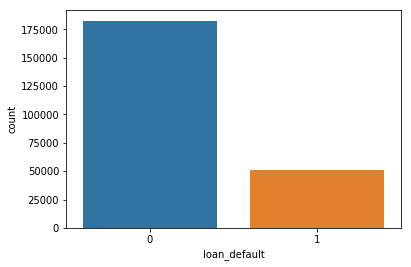

In [33]:
sns.countplot(train_df.loan_default)

In [62]:
info_df

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [36]:
train_df.loan_default.value_counts()


0    182543
1     50611
Name: loan_default, dtype: int64

In [37]:
scale_pos_weight = 182543/50611

In [59]:
train_df.select_dtypes('object').apply(lambda x: pd.Series.value_counts(x).shape)

Date.of.Birth                    (15433,)
Employment.Type                      (2,)
DisbursalDate                       (84,)
PERFORM_CNS.SCORE.DESCRIPTION       (20,)
AVERAGE.ACCT.AGE                   (192,)
CREDIT.HISTORY.LENGTH              (294,)
dtype: object

In [60]:
train_df.select_dtypes('object')

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-84,Salaried,03-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-85,Self employed,26-09-18,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-85,Self employed,01-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-93,Self employed,26-10-18,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-77,Self employed,26-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
5,08-09-90,Self employed,19-09-18,A-Very Low Risk,1yrs 9mon,2yrs 0mon
6,01-06-88,Salaried,23-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
7,04-10-89,Salaried,16-09-18,Not Scored: Not Enough Info available on the c...,0yrs 2mon,0yrs 2mon
8,15-11-91,Self employed,05-09-18,D-Very Low Risk,4yrs 8mon,4yrs 8mon
9,01-06-68,Salaried,16-09-18,A-Very Low Risk,1yrs 7mon,1yrs 7mon


In [54]:
# Employment.Type
# test_df.isnull().sum()
# train_df.dtypes

# df['dob'] = pd.to_datetime(df['dob'], format='%m%d%y')    # 1
# sns.countplot(train_df['Employment.Type'])
for col in train_df.columns:
    print(col.ljust(30), train_df[col].value_counts().shape[0])
    
# cat_cols = ['manufacturer_id','Employment.Type','DisbursalDate']

# 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'Driving_flag', 'VoterID_flag', 
# 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.OVERDUE.ACCTS', 
# 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'NO.OF_INQUIRIES',
# 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'



UniqueID                       233154
disbursed_amount               24565
asset_cost                     46252
ltv                            6579
branch_id                      82
supplier_id                    2953
manufacturer_id                11
Current_pincode_ID             6698
Date.of.Birth                  15433
Employment.Type                2
DisbursalDate                  84
State_ID                       22
Employee_code_ID               3270
MobileNo_Avl_Flag              1
Aadhar_flag                    2
PAN_flag                       2
VoterID_flag                   2
Driving_flag                   2
Passport_flag                  2
PERFORM_CNS.SCORE              573
PERFORM_CNS.SCORE.DESCRIPTION  20
PRI.NO.OF.ACCTS                108
PRI.ACTIVE.ACCTS               40
PRI.OVERDUE.ACCTS              22
PRI.CURRENT.BALANCE            71341
PRI.SANCTIONED.AMOUNT          44390
PRI.DISBURSED.AMOUNT           47909
SEC.NO.OF.ACCTS                37
SEC.ACTIVE.ACCTS       

In [83]:
train_df['date_of_birth'] = pd.to_datetime(train_df['Date.of.Birth'])
test_df['date_of_birth']  = pd.to_datetime(test_df['Date.of.Birth'])

train_df['day_of_birth'] = train_df['date_of_birth'].dt.day
train_df['month_of_birth'] = train_df['date_of_birth'].dt.month
train_df['year_of_birth'] = train_df['date_of_birth'].dt.year

test_df['day_of_birth'] = test_df['date_of_birth'].dt.day
test_df['month_of_birth'] = test_df['date_of_birth'].dt.month
test_df['year_of_birth'] = test_df['date_of_birth'].dt.year

In [84]:
train_df.drop(['date_of_birth','Date.of.Birth'], axis=1, inplace=True)
test_df.drop(['date_of_birth','Date.of.Birth'], axis=1, inplace=True)


In [ ]:
# DisbursalDate 	PERFORM_CNS.SCORE.DESCRIPTION 	AVERAGE.ACCT.AGE 	CREDIT.HISTORY.LENGTH

In [95]:
train_df['credit_hist_year'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0][:-3])
train_df['credit_hist_month'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1][:-3])

train_df['loan_tenure_year'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0][:-3])
train_df['loan_tenure_month'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1][:-3])

test_df['credit_hist_year'] = test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0][:-3])
test_df['credit_hist_month'] = test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1][:-3])

test_df['loan_tenure_year'] = test_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0][:-3])
test_df['loan_tenure_month'] = test_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1][:-3])

train_df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis=1, inplace=True)
test_df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis=1, inplace=True)


In [98]:
train_df['disbursal_date'] = pd.to_datetime(train_df['DisbursalDate'])
test_df['disbursal_date']  = pd.to_datetime(test_df['DisbursalDate'])

train_df['day_of_disbursal']   = train_df['disbursal_date'].dt.day
train_df['month_of_disbursal'] = train_df['disbursal_date'].dt.month
train_df['year_of_disbursal']  = train_df['disbursal_date'].dt.year

test_df['day_of_disbursal']   = test_df['disbursal_date'].dt.day
test_df['month_of_disbursal'] = test_df['disbursal_date'].dt.month
test_df['year_of_disbursal']  = test_df['disbursal_date'].dt.year

train_df.drop(['disbursal_date','DisbursalDate'], axis=1, inplace=True)
test_df.drop(['disbursal_date','DisbursalDate'], axis=1, inplace=True)


## Very suspicious various `train_df['PERFORM_CNS.SCORE.DESCRIPTION']`

In [102]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

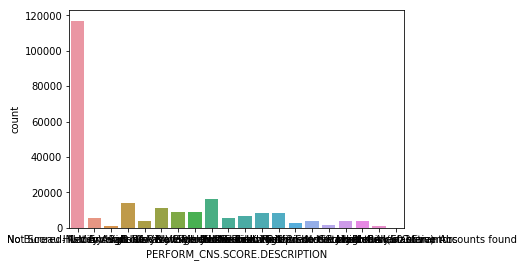

In [101]:
sns.countplot(train_df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [125]:
train_df.groupby(['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE'])['PERFORM_CNS.SCORE'].mean()

PERFORM_CNS.SCORE.DESCRIPTION                            PERFORM_CNS.SCORE
A-Very Low Risk                                          806                  806
                                                         807                  807
                                                         808                  808
                                                         809                  809
                                                         810                  810
                                                         811                  811
                                                         812                  812
                                                         813                  813
                                                         814                  814
                                                         815                  815
                                                         816                  816
                       

In [126]:
# bureau description and corresponding score
mapping = {'No Bureau History Available'                         :'not_enough_info',# 00
        'Not Scored: More than 50 active Accounts found'         :'not_enough_info',# 11
        'Not Scored: No Activity seen on the customer (Inactive)':'not_enough_info',# 16
        'Not Scored: No Updates available in last 36 months'     :'not_enough_info',# 18 
        'Not Scored: Not Enough Info available on the customer'  :'not_enough_info',# 17
        'Not Scored: Only a Guarantor'                           :'not_enough_info',# 14
        'Not Scored: Sufficient History Not Available'           :'not_enough_info' # 15
       }


In [133]:
train_df['Bureau_desc'] = train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(mapping)
test_df['Bureau_desc'] = test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(mapping)

In [ ]:
use_index = train_df[['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE']][
    train_df['Bureau_desc'] == 'not_enough_info']['PERFORM_CNS.SCORE'].index
train_df['bureau_score'] = train_df['PERFORM_CNS.SCORE']
train_df.loc[use_index,'bureau_score'] = 0


use_index = test_df[['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE']][
    test_df['Bureau_desc'] == 'not_enough_info']['PERFORM_CNS.SCORE'].index
test_df['bureau_score'] = test_df['PERFORM_CNS.SCORE']
test_df.loc[use_index,'bureau_score'] = 0

In [151]:
train_df.drop(['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE'], axis=1, inplace=True)
test_df.drop(['PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE'], axis=1, inplace=True)


In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['Bureau_desc'])+list(test_df['Bureau_desc']))
print(le.classes_)
train_df['Bureau_desc'] = le.transform(train_df['Bureau_desc'])
test_df['Bureau_desc'] = le.transform(test_df['Bureau_desc'])


['A-Very Low Risk' 'B-Very Low Risk' 'C-Very Low Risk' 'D-Very Low Risk'
 'E-Low Risk' 'F-Low Risk' 'G-Low Risk' 'H-Medium Risk' 'I-Medium Risk'
 'J-High Risk' 'K-High Risk' 'L-Very High Risk' 'M-Very High Risk'
 'not_enough_info']


In [155]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,year_of_birth,credit_hist_year,credit_hist_month,loan_tenure_year,loan_tenure_month,day_of_disbursal,month_of_disbursal,year_of_disbursal,Bureau_desc,bureau_score
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,1984,0,0,0,0,8,3,2018,13,0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,1985,1,11,1,11,26,9,2018,8,598
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,1985,0,0,0,0,8,1,2018,13,0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,1993,1,3,0,8,26,10,2018,11,305
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,1977,0,0,0,0,26,9,2018,13,0


In [162]:
cat_cols = ['State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'Driving_flag', 
            'VoterID_flag', 'Passport_flag', 'PRI.OVERDUE.ACCTS', 'SEC.NO.OF.ACCTS',
            'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'NO.OF_INQUIRIES',
            'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

In [180]:
# train_df[['credit_hist_year', 'credit_hist_month','loan_tenure_year', 'loan_tenure_month']] = \
# train_df[['credit_hist_year', 'credit_hist_month','loan_tenure_year', 'loan_tenure_month']].astype('int')

test_df[['credit_hist_year', 'credit_hist_month','loan_tenure_year', 'loan_tenure_month']] = \
test_df[['credit_hist_year', 'credit_hist_month','loan_tenure_year', 'loan_tenure_month']].astype('int')

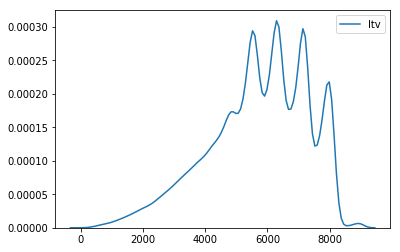

In [177]:
import numpy as np
sns.kdeplot(np.power(train_df['ltv'],2))
# sns.kdeplot(train_df['ltv'])

In [182]:
tr_ids = train_df['UniqueID']
ts_ids = test_df['UniqueID']
train_df.drop('UniqueID', axis=1, inplace=True)
test_df.drop('UniqueID', axis=1, inplace=True)
target = train_df['loan_default']

In [209]:
train_df.drop('loan_default', axis=1, inplace=True)

In [183]:
file_path = 'baseline'
random_seed = 2019
splits = 3
sub = sub_df.copy()
del sub_df

In [198]:
target.value_counts()
# 182543/50611

0    182543
1     50611
Name: loan_default, dtype: int64

In [195]:
target[train_df['Employment.Type'].isnull()].value_counts()

0    6017
1    1644
Name: loan_default, dtype: int64

In [202]:
train_df['Employment.Type'].fillna('Self employed', inplace=True)
test_df['Employment.Type'].fillna('Self employed', inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['Employment.Type'])+list(test_df['Employment.Type']))
print(le.classes_)
train_df['Employment.Type'] = le.transform(train_df['Employment.Type'])
test_df['Employment.Type'] = le.transform(test_df['Employment.Type'])


['Salaried' 'Self employed']


In [254]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import xgboost as xgb

features = train_df.columns
params = {
    'eval_metric'     : 'auc',
    'seed'            : 1337,
    'eta'             : 0.05,
    'subsample'       : 0.7,
    'colsample_bytree': 0.5,
    'silent'          : 1,
    'nthread'         : 4,
    'Scale_pos_weight': 3.607,
    'objective'       : 'binary:logistic',
    'max_depth'       : 4,
    'alpha'           : 0.05
}

n_splits = splits
verbose_eval = 50
early_stop = 50
num_rounds = 10000


folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_xgb = np.zeros(len(train_df))
test_pred = np.zeros((len(test_df),n_splits))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    
    d_train = xgb.DMatrix( data          = train_df.iloc[trn_idx][features], 
                           label         = target.iloc[trn_idx], 
                           feature_names = train_df.columns)
    d_valid = xgb.DMatrix( data          = train_df.iloc[val_idx][features], 
                           label         = target.iloc[val_idx], 
                           feature_names = train_df.columns)

    watchlist = [(d_valid, 'valid')]
    model = xgb.train(dtrain=d_train, num_boost_round=num_rounds, 
                      evals=watchlist,
                      early_stopping_rounds=early_stop, 
                      verbose_eval=verbose_eval, params=params)

    valid_pred = model.predict(xgb.DMatrix(train_df.iloc[val_idx][features], 
                                           feature_names=train_df.columns), 
                               ntree_limit=model.best_ntree_limit)
    


    test_pred = model.predict(xgb.DMatrix(test_df[features], 
                                          feature_names=train_df.columns), 
                              ntree_limit=model.best_ntree_limit)

    oof_xgb[val_idx]   = valid_pred
#     predictions   += test_pred



print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_xgb)))

sub_df = pd.DataFrame({"id":ts_ids})
sub_df["target"] = test_pred.mean(axis=1)
# sub_df.target = np.where(sub_df.target>0.5,1,0)

sub_df.columns = sub.columns
sub_df.to_csv('submission/xgboost_{}.csv'.format(file_path), index=None)

sub_df.head()

Fold 0
[0]	valid-auc:0.603831
Will train until valid-auc hasn't improved in 50 rounds.
[50]	valid-auc:0.644898
[100]	valid-auc:0.655913
[150]	valid-auc:0.660914
[200]	valid-auc:0.663161
[250]	valid-auc:0.664966
[300]	valid-auc:0.666125
[350]	valid-auc:0.667007
[400]	valid-auc:0.667353
[450]	valid-auc:0.667795
[500]	valid-auc:0.668456
[550]	valid-auc:0.668612
[600]	valid-auc:0.668875
[650]	valid-auc:0.669347
[700]	valid-auc:0.669697
[750]	valid-auc:0.670025
[800]	valid-auc:0.670295
[850]	valid-auc:0.670387
[900]	valid-auc:0.670403
[950]	valid-auc:0.670481
[1000]	valid-auc:0.670504
[1050]	valid-auc:0.670587
[1100]	valid-auc:0.670717
[1150]	valid-auc:0.670776
Stopping. Best iteration:
[1119]	valid-auc:0.670824

Fold 1
[0]	valid-auc:0.6045
Will train until valid-auc hasn't improved in 50 rounds.


KeyboardInterrupt: 

<BarContainer object of 43 artists>

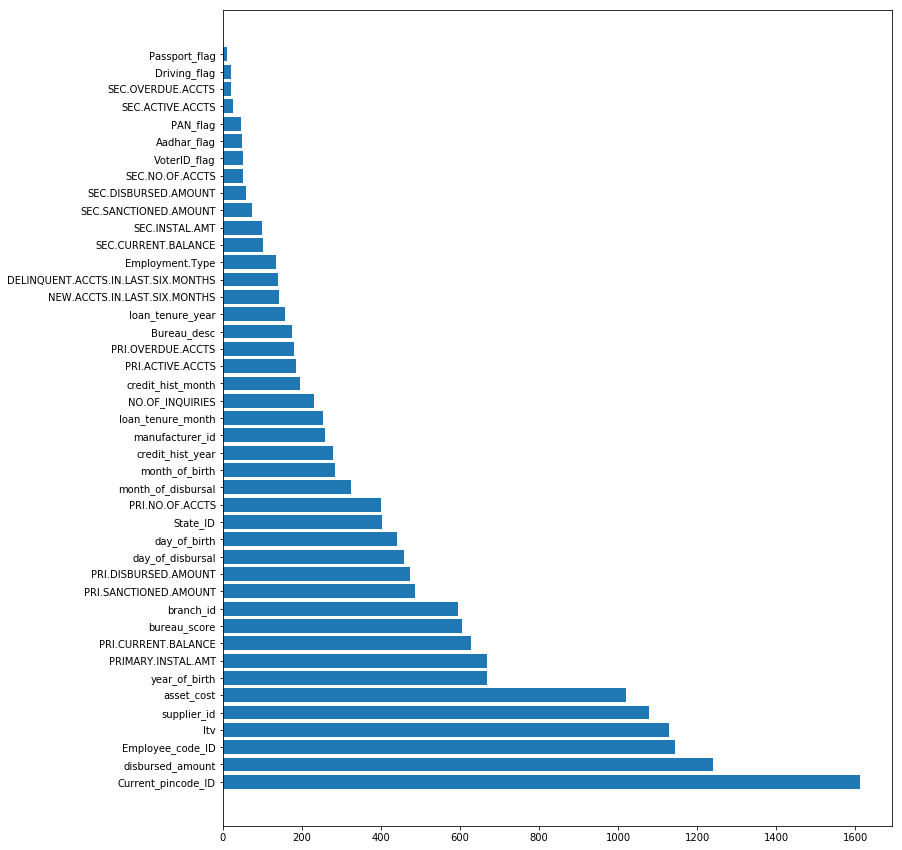

In [261]:
xgb_imp = pd.DataFrame(data=[list(model.get_fscore().keys()), list(model.get_fscore().values())]).T
xgb_imp.columns = ['feature','imp']
xgb_imp = xgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(xgb_imp.feature, xgb_imp.imp)

In [216]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import Pool, CatBoostClassifier
import catboost

features = train_df.columns
 
model = CatBoostClassifier(loss_function         = "Logloss", 
                           eval_metric           = "AUC",
                           random_strength       = 1.5,
                           border_count          = 128,
                           scale_pos_weight      = 3.507,
                           depth                 = 4, 
                           early_stopping_rounds = 50,
                           random_seed           = 1337,
                           task_type             = 'CPU', 
#                            subsample           = 0.7, 
                           iterations            = 10000, 
                           learning_rate         = 0.09
                          )
    

n_split = splits
kf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=random_seed)

y_valid_pred = 0 * target
oof_cat = np.zeros(len(train_df))
y_test_pred = 0


for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
    y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
    X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
    _train = Pool(X_train, label=y_train)#, cat_features=cate_features_index)
    _valid = Pool(X_valid, label=y_valid)#, cat_features=cate_features_index)
    print( "\nFold ", idx)

    fit_model = model.fit(_train, 
                          eval_set=_valid,
                          use_best_model=True,
                          verbose=50
                         )
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  auc = ", roc_auc_score(y_valid, pred) )
    
    try:
        y_valid_pred.iloc[valid_index] = pred
    except:
        y_valid_pred.iloc[valid_index] = pred.reshape(-1,1)
    
    y_test_pred += fit_model.predict_proba(test_df)[:,1]

    oof_cat[valid_index] = fit_model.predict_proba(train_df.iloc[valid_index][features])[:,1]
     
    print("="*60)

y_test_pred /= n_split


print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_cat)))
sub_df = pd.DataFrame({"ID_code":test_id})
sub_df["target"] = y_test_pred
sub_df.columns = sub.columns

 
sub_df.to_csv('submission/catboost_{}.csv'.format(file_path), index=None)




Fold  0
0:	test: 0.5976353	best: 0.5976353 (0)	total: 134ms	remaining: 22m 23s
50:	test: 0.6457817	best: 0.6457817 (50)	total: 3.97s	remaining: 12m 54s
100:	test: 0.6525894	best: 0.6525894 (100)	total: 7.91s	remaining: 12m 55s
150:	test: 0.6562635	best: 0.6562635 (150)	total: 11.7s	remaining: 12m 42s
200:	test: 0.6597830	best: 0.6597830 (200)	total: 15.5s	remaining: 12m 37s
250:	test: 0.6616704	best: 0.6616704 (250)	total: 19.3s	remaining: 12m 30s
300:	test: 0.6629787	best: 0.6629787 (300)	total: 23.2s	remaining: 12m 26s
350:	test: 0.6638711	best: 0.6638711 (350)	total: 27.1s	remaining: 12m 24s
400:	test: 0.6646430	best: 0.6646430 (400)	total: 31s	remaining: 12m 21s
450:	test: 0.6650118	best: 0.6650324 (447)	total: 34.8s	remaining: 12m 16s
500:	test: 0.6652865	best: 0.6653097 (499)	total: 38.8s	remaining: 12m 15s
550:	test: 0.6658587	best: 0.6658587 (550)	total: 42.6s	remaining: 12m 10s
600:	test: 0.6663574	best: 0.6663682 (599)	total: 46.4s	remaining: 12m 5s
650:	test: 0.6665359	best

NameError: name 'test_id' is not defined

<BarContainer object of 45 artists>

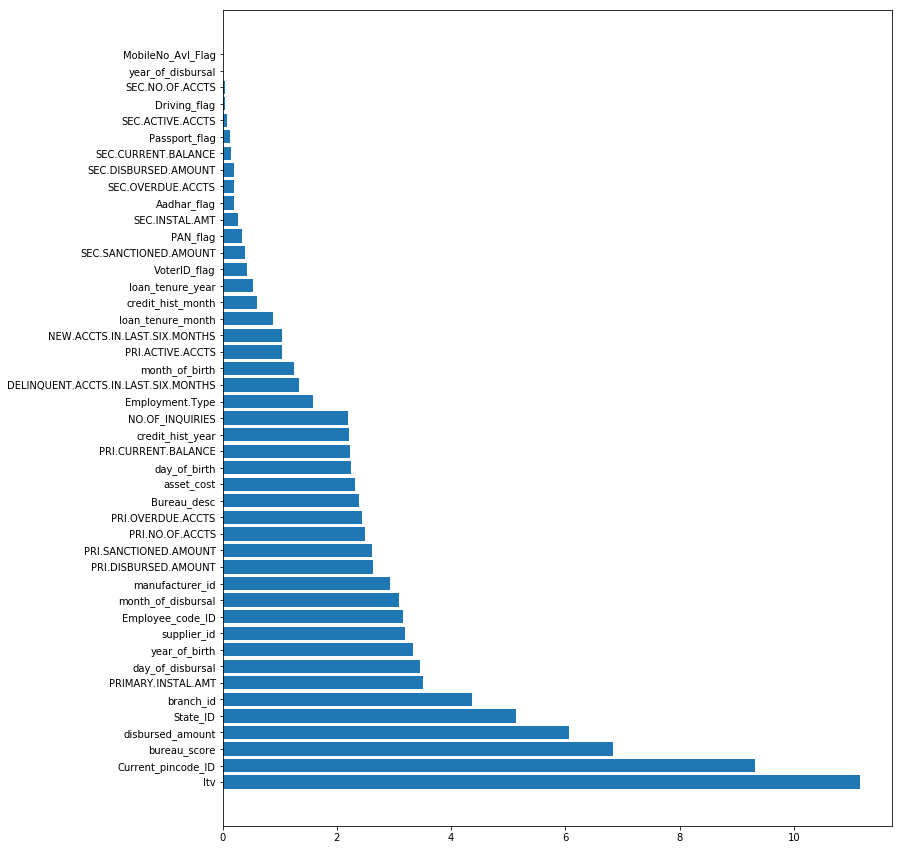

In [249]:

cat_imp = pd.DataFrame(data=[fit_model.feature_names_, list(fit_model.feature_importances_)]).T
cat_imp.columns = ['feature','imp']
cat_imp = cat_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(cat_imp.feature, cat_imp.imp)

In [215]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import lightgbm as lgb

features = train_df.columns
param = {
    'bagging_freq'           : 5,
    'bagging_fraction'       : 0.33,
    'boost_from_average'     : 'false',
    'boost'                  : 'gbdt',
    'feature_fraction'       : 0.3,
    'learning_rate'          : 0.01,
    'max_depth'              : -1,
    'metric'                 : 'auc',
    'min_data_in_leaf'       : 100,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves'             : 30,
    'num_threads'            : 4,
    'tree_learner'           : 'serial',
    'objective'              : 'binary',
    'verbosity'              : 1,
#     'lambda_l1'              : 0.001,
    'lambda_l2'              : 0.5
}   

n_splits = splits
num_round = 10000
folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_lgb = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
cat_columns = list(temp[temp<50].index)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print(trn_idx.shape, val_idx.shape)
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns)

    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns) 

    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=50, early_stopping_rounds = 25)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
    print("="*60)

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

sub_df = pd.DataFrame({"ID_code":test_id})
sub_df["target"] = predictions

sub_df.columns = sub.columns
sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)



(155435,) (77719,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[50]	training's auc: 0.659758	valid_1's auc: 0.647397
[100]	training's auc: 0.662633	valid_1's auc: 0.650504
[150]	training's auc: 0.665962	valid_1's auc: 0.653494
[200]	training's auc: 0.668129	valid_1's auc: 0.654901
[250]	training's auc: 0.671072	valid_1's auc: 0.656822
[300]	training's auc: 0.673274	valid_1's auc: 0.658062
[350]	training's auc: 0.675917	valid_1's auc: 0.659576
[400]	training's auc: 0.678004	valid_1's auc: 0.660715
[450]	training's auc: 0.680148	valid_1's auc: 0.661919
[500]	training's auc: 0.682139	valid_1's auc: 0.662723
[550]	training's auc: 0.684215	valid_1's auc: 0.663743
[600]	training's auc: 0.685809	valid_1's auc: 0.664282
[650]	training's auc: 0.687527	valid_1's auc: 0.664928
[700]	training's auc: 0.689222	valid_1's auc: 0.665523
[750]	training's auc: 0.690753	valid_1's auc: 0.665996
[800]	training's auc: 0.692362	valid_1's auc: 0.666599
[850]	training's auc: 0.69376	val

KeyboardInterrupt: 

<BarContainer object of 45 artists>

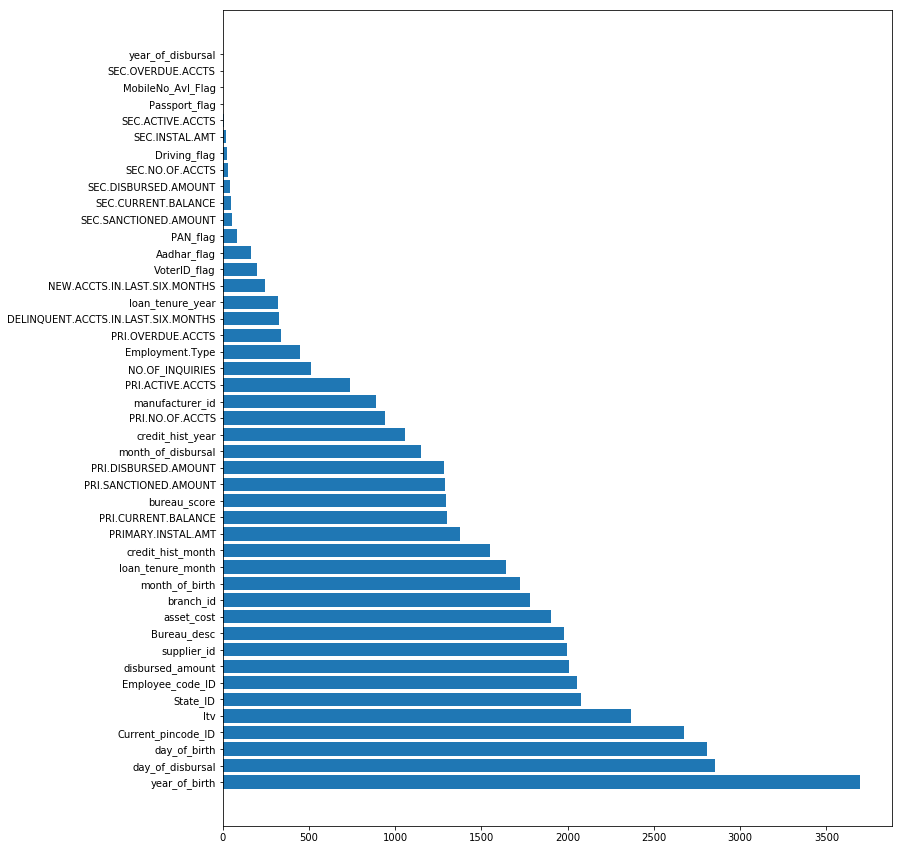

In [244]:

lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
lgb_imp.columns = ['feature','imp']
lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(lgb_imp.feature, lgb_imp.imp)

In [265]:
train_df_save = train_df.copy()
test_df_save = test_df.copy()
train_df.shape, test_df.shape, target.shape

((233154, 45), (112392, 45), (233154,))

In [266]:
train_df = pd.concat([tr_ids, train_df, target], axis=1)
test_df  = pd.concat([ts_ids, test_df], axis=1)
train_df.shape, test_df.shape

((233154, 47), (112392, 46))

In [269]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,credit_hist_year,credit_hist_month,loan_tenure_year,loan_tenure_month,day_of_disbursal,month_of_disbursal,year_of_disbursal,Bureau_desc,bureau_score,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,0,6,...,0,0,0,0,8,3,2018,13,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1,6,...,1,11,1,11,26,9,2018,8,598,1
2,417566,53278,61360,89.63,67,22807,45,1497,1,6,...,0,0,0,0,8,1,2018,13,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1,6,...,1,3,0,8,26,10,2018,11,305,1
4,539055,52378,60300,88.39,67,22807,45,1495,1,6,...,0,0,0,0,26,9,2018,13,0,1


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7fe58bae22e8>>
Traceback (most recent call last):
  File "/home/ankish/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


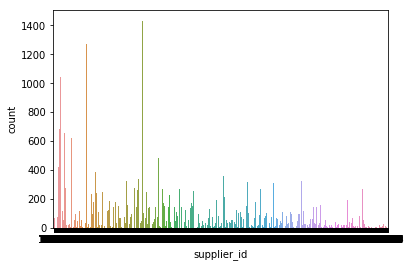

In [271]:
# sns.countplot(x='supplier_id', y='loan_default', data=train_df)
sns.countplot(train_df['supplier_id'])

In [281]:
train_df.groupby(['supplier_id','loan_default'])['loan_default'].count().unstack().mean()

loan_default
0    62.967575
1    18.983871
dtype: float64

In [276]:
len(set(train_df.supplier_id)),len(set(test_df.supplier_id)), len(set(train_df.supplier_id).intersection(set(test_df.supplier_id)))

(2953, 2863, 2727)

In [282]:
len(set(train_df.State_ID)),len(set(test_df.State_ID)), len(set(train_df.State_ID).intersection(set(test_df.State_ID)))

(22, 22, 22)

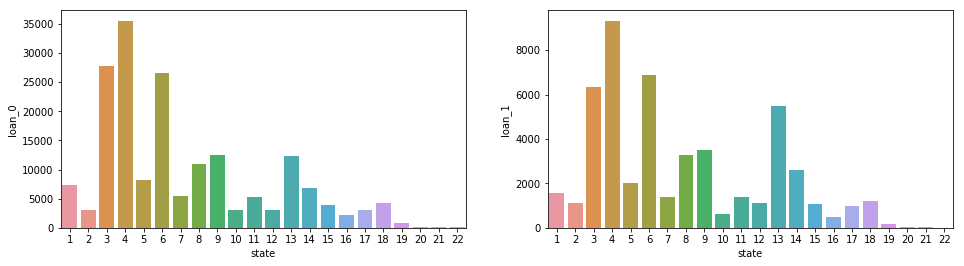

In [301]:
state_gps = train_df.groupby(['State_ID','loan_default'])['loan_default'].count().unstack()
state_gps.columns = ['loan_0', 'loan_1']
state_gps['state'] = state_gps.index

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=state_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=state_gps, ax=ax[1])#,label='1')
# plt.legend()

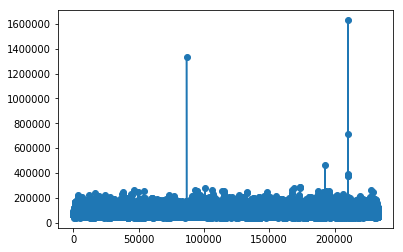

In [303]:
# asset_cost 	Cost of the Asset 	NaN
# 4 	ltv 	Loan to Value of the asset 	NaN
# 5 	branch_id 	Branch where the loan was disbursed 	NaN
# 6 	supplier_id 	Vehicle Dealer where the loan was disbursed 	NaN
# 7 	manufacturer_id 	Vehicle manufacturer(Hero, Honda, TVS etc.) 	NaN

plt.plot(train_df['asset_cost'],'-o')

228729 233154
unique values:  (46252,) (46252,) (43802,) (43802,)


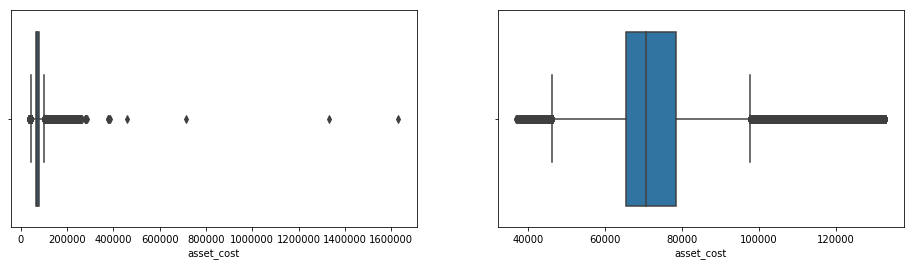

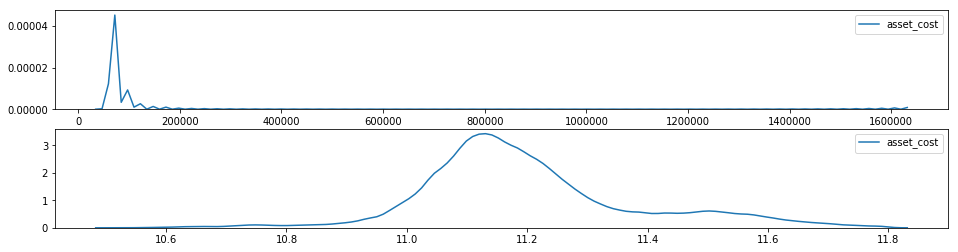

In [330]:
col = 'asset_cost'
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(np.log(tp), ax=ax[1])#,label='1')

print("unique values: ", train_df[col].unique().shape, 
      train_df[col].round().unique().shape, 
      tp.unique().shape, tp.round().unique().shape)

230409 233154


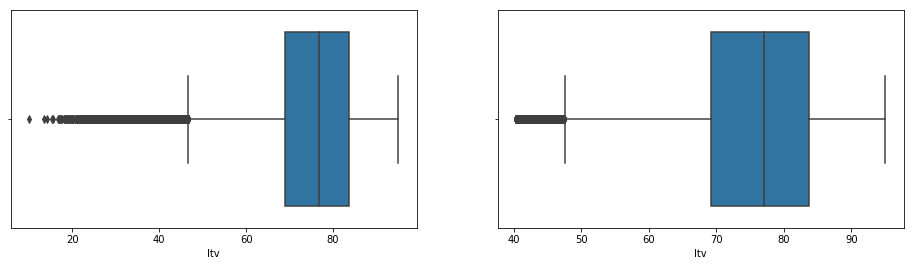

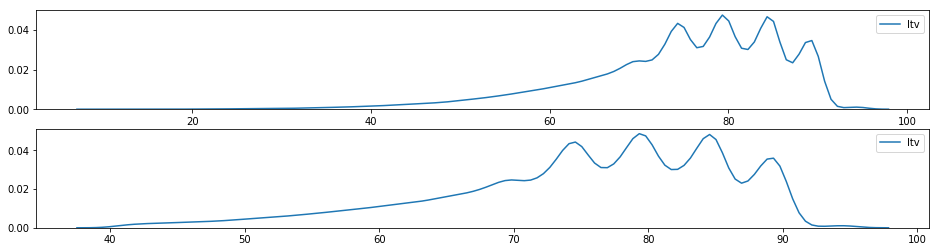

In [321]:
col = 'ltv'
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

In [328]:
train_df[col].unique().shape, train_df[col].round().unique().shape, tp.unique().shape, tp.round().unique().shape

((6579,), (83,), (5282,), (56,))

In [316]:
len(set(train_df.branch_id)),len(set(test_df.branch_id)), \
len(set(train_df.branch_id).intersection(set(test_df.branch_id))),\
len(set(train_df.supplier_id)),len(set(test_df.supplier_id)), \
len(set(train_df.supplier_id).intersection(set(test_df.supplier_id))),\
len(set(train_df.manufacturer_id)),len(set(test_df.manufacturer_id)), \
len(set(train_df.manufacturer_id).intersection(set(test_df.manufacturer_id)))

(82, 82, 82, 2953, 2863, 2727, 11, 11, 10)

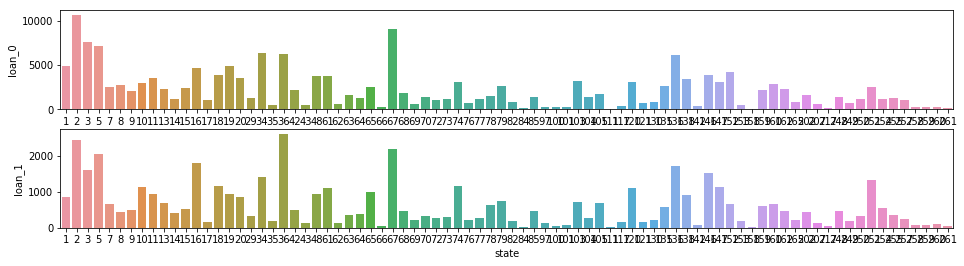

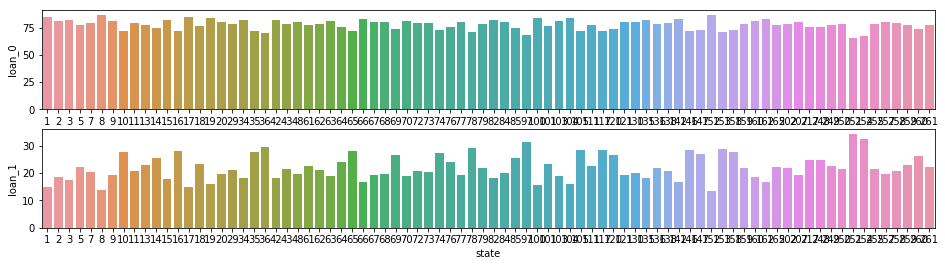

In [359]:
branch_gps = train_df.groupby(['branch_id','loan_default'])['loan_default'].count().unstack()
branch_gps.columns = ['loan_0', 'loan_1']
branch_gps['state'] = branch_gps.index

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=branch_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=branch_gps, ax=ax[1])#,label='1')

branch_gps[['loan_0','loan_1']] = 100*branch_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=branch_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=branch_gps, ax=ax[1])#,label='1')



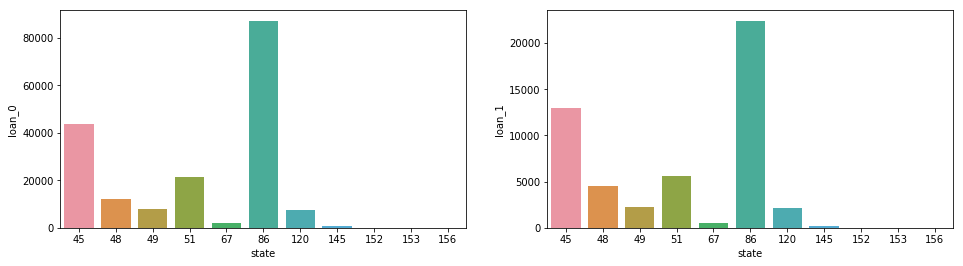

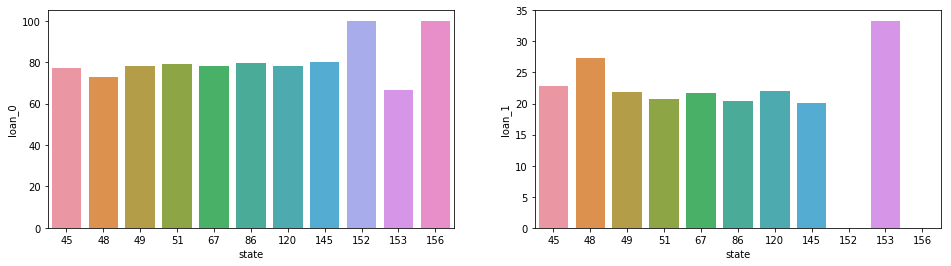

In [358]:
manufac_gps = train_df.groupby(['manufacturer_id','loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index
# manufac_gps[['loan_0']] = 100*manufac_gps[['loan_0']]/train_df.shape[0]
# manufac_gps[['loan_1']] = 100*manufac_gps[['loan_1']]/train_df.shape[0]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

In [ ]:
# Application amount: This is the amount you are applying for. You might want to apply for a loan of 40 lakhs to pursue your higher studies.
# Sanctioned amount: This is the amount that the bank has approved you for after their due diligence. This will be less than or equal to the application amount. In the case mentioned above, it might happen that the bank can only approve you for a loan for 30 lakhs due to any number of reasons.
# Disbursed amount: The amount that has been used from the sanctioned amount. It might happen that you were approved for 30 lakhs. But you received a scholarship, or decided to use your savings to fund your education. You only take 5 lakhs from the bank as the loan. This is the disbursed amount
    

22  	PRI.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Primary accounts are those which the customer ...
23  	PRI.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
24  	PRI.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN
25 	PRI.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	The outstanding amount is the Total due of your loan that you need to pay to the bank including interest and principal till date. Its nothing but the total loan amount sanctioned minus the pricipal part part of ur EMI.
26 	PRI.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
27 	PRI.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo... 	NaN


In [366]:
cols = [  'PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS',
          'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT',
          'PRIMARY.INSTAL.AMT']
train_df[cols].apply(lambda x: pd.Series.value_counts(x).shape[0])

PRI.NO.OF.ACCTS            108
PRI.ACTIVE.ACCTS            40
PRI.OVERDUE.ACCTS           22
PRI.CURRENT.BALANCE      71341
PRI.SANCTIONED.AMOUNT    44390
PRI.DISBURSED.AMOUNT     47909
PRIMARY.INSTAL.AMT       28067
dtype: int64

229035 233154


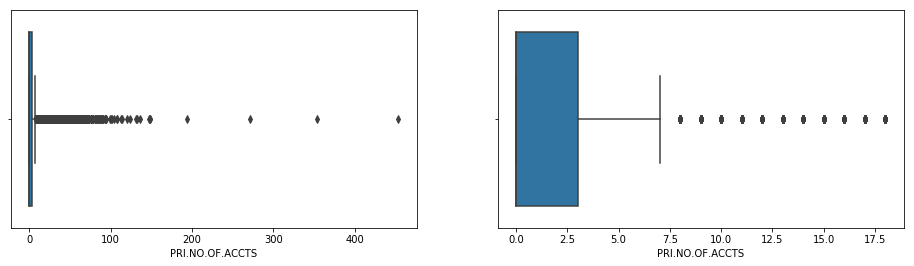

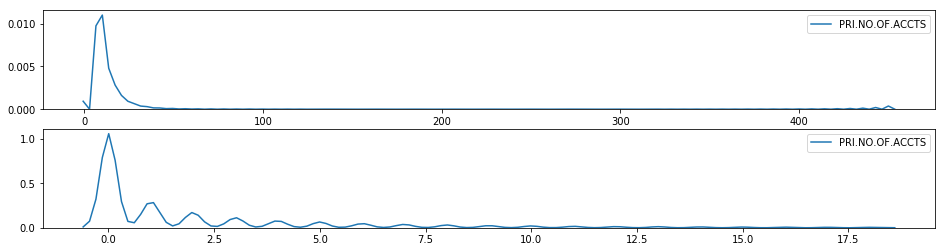

In [367]:
col = cols[0]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

227678 233154


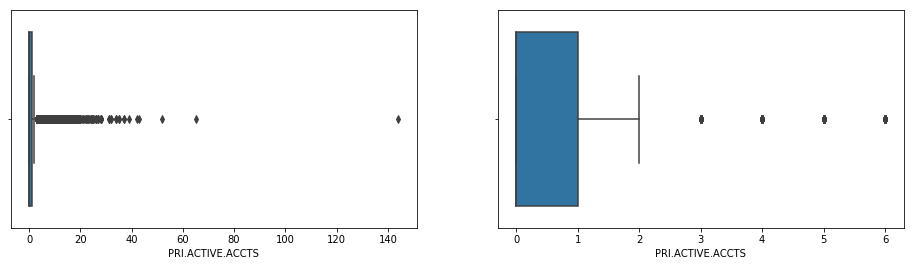

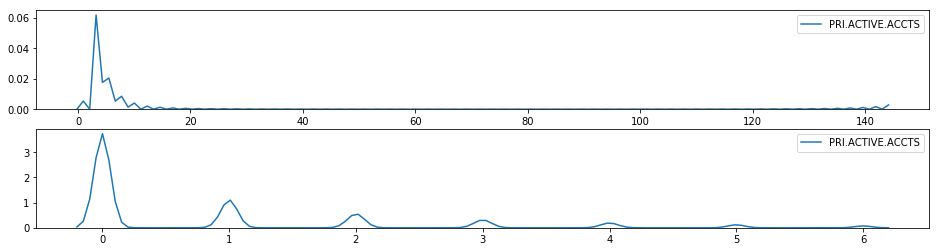

In [368]:
col = cols[1]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

226849 233154


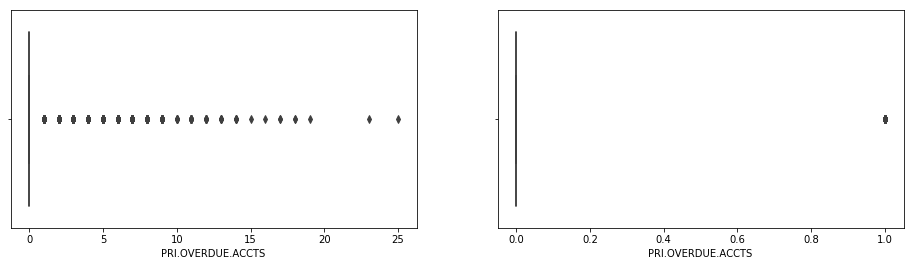

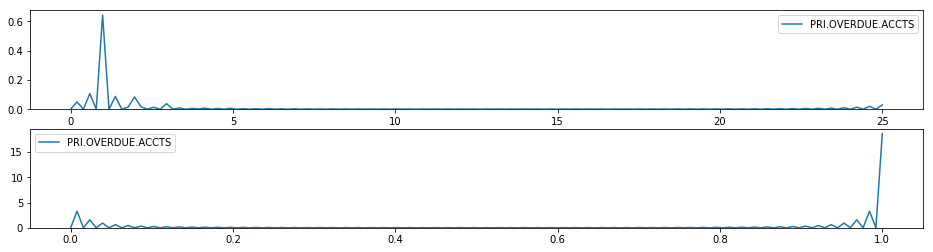

In [369]:
col = cols[2]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


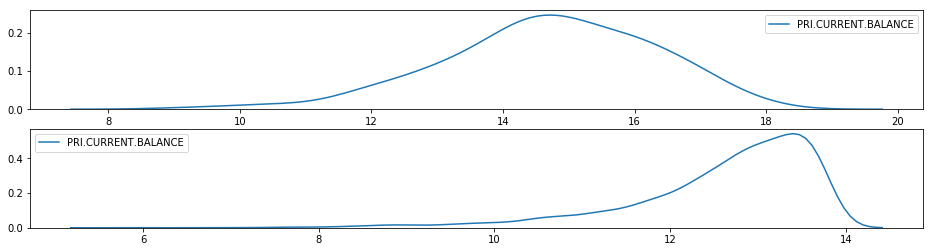

In [390]:
fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(np.log(2+train_df[col]+train_df[col].min()), ax=ax[0])#,label='0')
sns.kdeplot(np.log(2+tp+tp.min()), ax=ax[1])#,label='1')

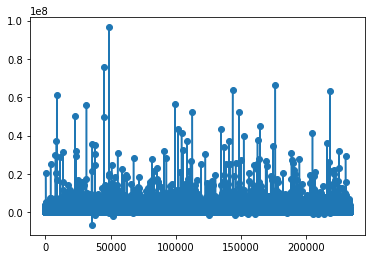

In [397]:
plt.plot(train_df[col],'-o')

In [423]:
# train_df[train_df[col]>4000000][[col,cols[4],cols[5],'loan_default']]
train_df[train_df[col]>3000000]['loan_default'].value_counts()


0    1926
1     301
Name: loan_default, dtype: int64

# Drop all the rows with income more than `30Lakh`, which is only 1% of data, will not hurt too much(I guess)

In [536]:
col = cols[3]


(0.8078866823261442, 0.9551626821757293)

In [436]:
100*test_df[test_df[col]>3000000][[col,cols[4],cols[5]]].shape[0]/test_df.shape[0],\
100*train_df[train_df[col]>3000000][[col,cols[4],cols[5],'loan_default']].shape[0]/train_df.shape[0]


(0.8078866823261442, 0.9551626821757293)

In [487]:
100*train_df[train_df[col]<0][[col,cols[4],cols[5]]].shape[0]/train_df.shape[0],\
100*test_df[test_df[col]<0][[col,cols[4],cols[5]]].shape[0]/test_df.shape[0]


(0.19214767921631196, 0.19396398320165137)

0    383
1     65
Name: loan_default, dtype: int64

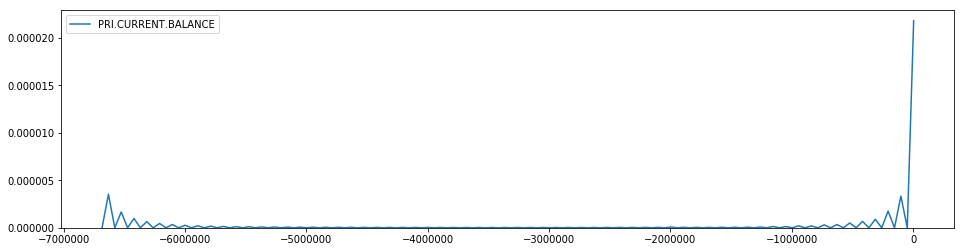

In [494]:
fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(train_df[train_df[col]<0][col])

train_df[train_df[col]<0]['loan_default'].value_counts()

In [517]:
# (-train_df[col].min() + train_df[col])>0

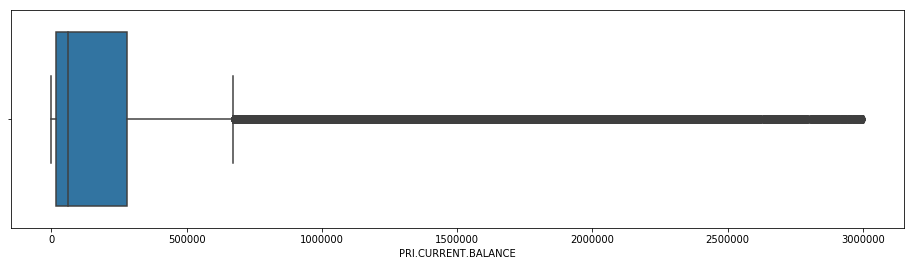

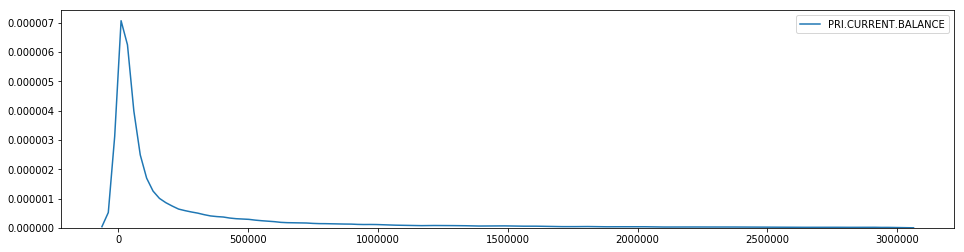

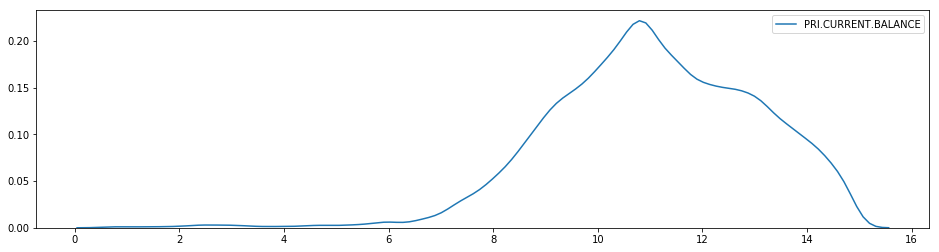

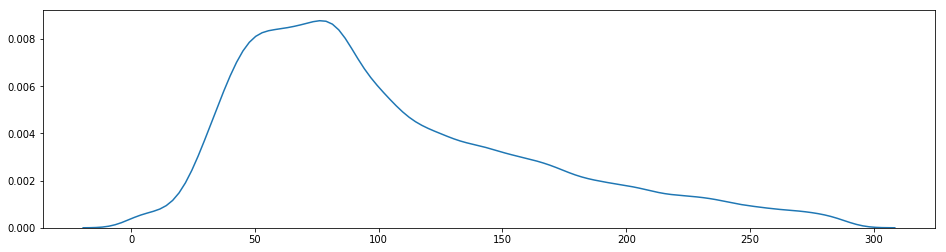

In [516]:
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col], ax=ax)

fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])


# fig, ax = plt.subplots(figsize=(16,4))
# sns.kdeplot(boxcox(train_df[col]-train_df[col].min()+1)[0])



fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(np.log(1+train_df[(train_df[col]<3000000) & (train_df[col]>0)][col]))

# scipy.stats.boxcox(x, lmbda=None, alpha=None)
# y = (x**lmbda - 1) / lmbda,  for lmbda > 0
#     log(x),                  for lmbda = 0
# def boxcox_func(x, lambda_):
#     return x**lambda_ -1
from scipy.stats import boxcox
fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col],0.3))
# boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])

In [467]:
# train_df[(train_df[col]<3000000) & (train_df[col]>0)][col].shape
# x = stats.loggamma.rvs(5, size=500) + 5
# x.shape
boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col], lmbda=2)

array([  3.80880000e+08,   2.65567432e+09,   2.28487500e+05, ...,
         2.45070000e+07,   2.02854110e+10,   7.62228681e+10])

230914 233154
-6678296 96524920 -2018309 2990946


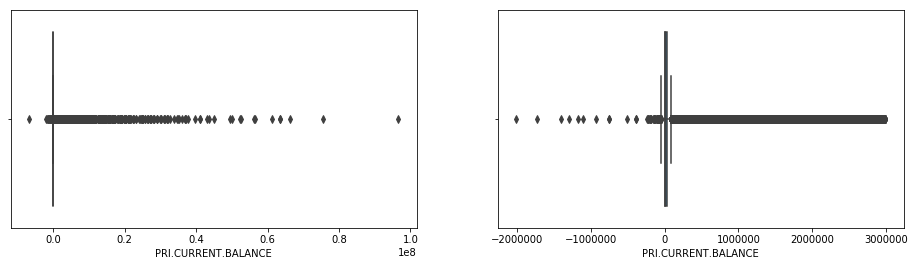

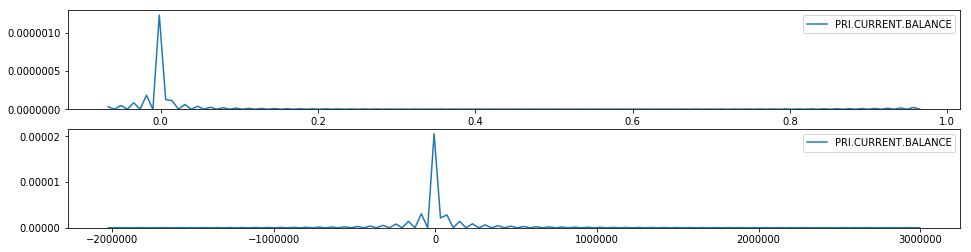

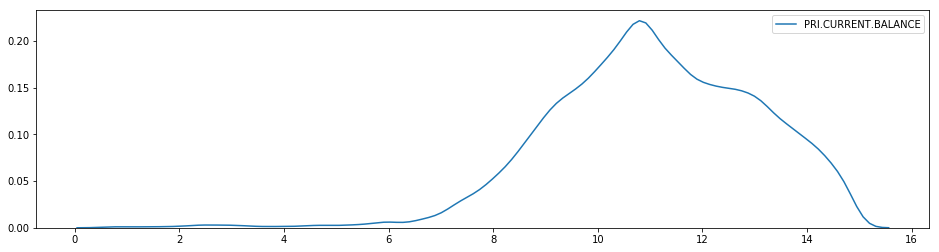

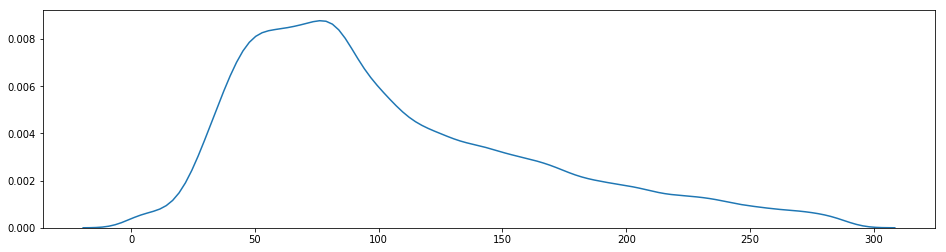

In [518]:
col = cols[3]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
# tp = pd.DataFrame(tp, columns=[col])
# tp = tp[col][(np.abs(stats.zscore(tp[[col]])) < 3).all(axis=1)]

sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])
print(train_df[col].min(), train_df[col].max(), tp.min(), tp.max())

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(np.log(1+train_df[(train_df[col]<3000000) & (train_df[col]>0)][col]))

from scipy.stats import boxcox
fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col],0.3))
# boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])

PRI.SANCTIONED.AMOUNT
232537 233154


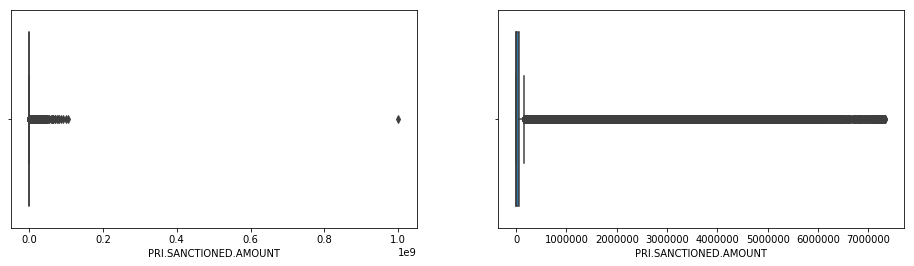

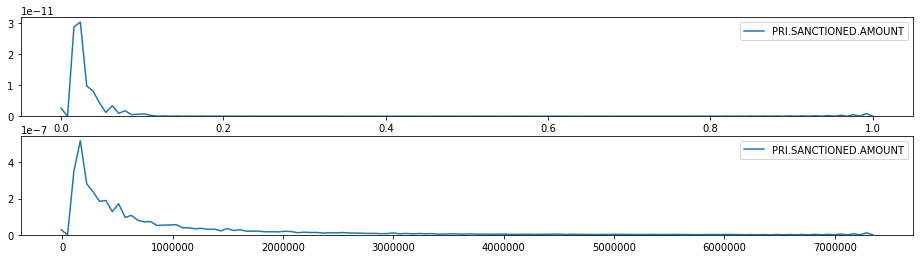

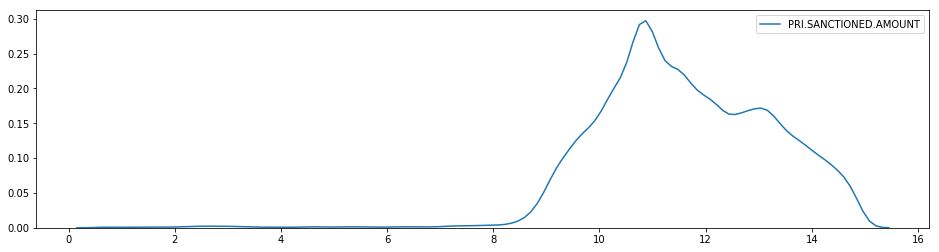

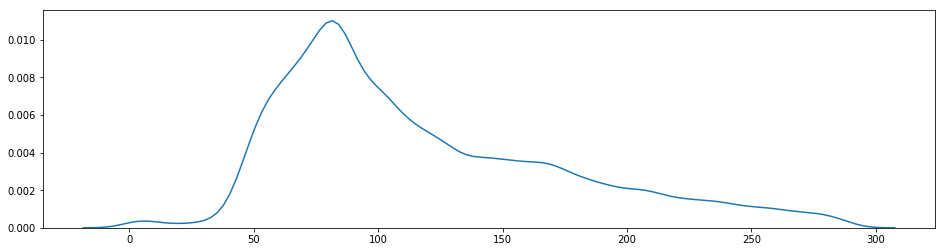

In [520]:
col = cols[4]
print(col)
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(np.log(1+train_df[(train_df[col]<3000000) & (train_df[col]>0)][col]))

# scipy.stats.boxcox(x, lmbda=None, alpha=None)
# y = (x**lmbda - 1) / lmbda,  for lmbda > 0
#     log(x),                  for lmbda = 0
# def boxcox_func(x, lambda_):
#     return x**lambda_ -1
from scipy.stats import boxcox
fig, ax = plt.subplots(figsize=(16,4))
sns.kdeplot(boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col],0.3))
# boxcox(train_df[(train_df[col]<3000000) & (train_df[col]>0)][col])

232538 233154


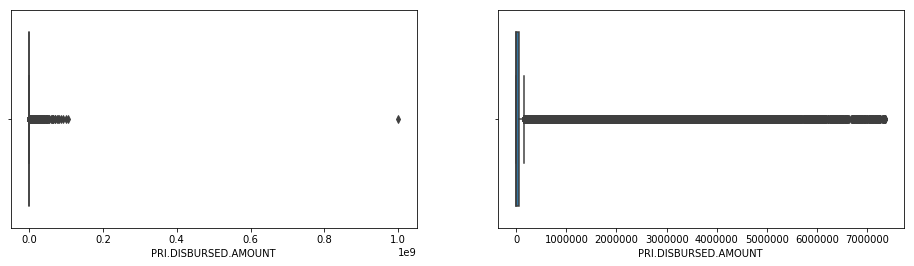

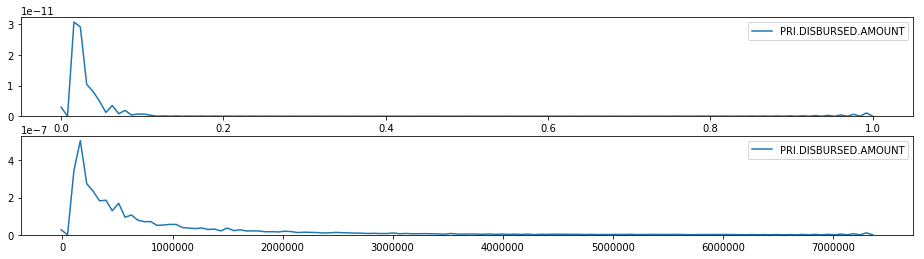

In [372]:
col = cols[5]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

In [530]:
cols[3]

'PRI.CURRENT.BALANCE'

In [529]:
train_df[train_df[cols[3]] > 0][[cols[3],cols[4],cols[5]]].shape, train_df.shape

((91010, 3), (233154, 47))

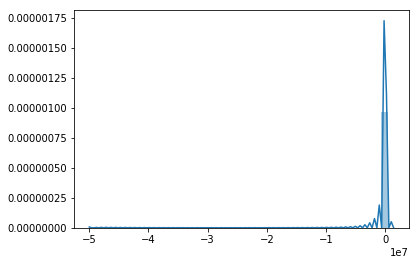

In [532]:
sns.distplot(train_df[train_df[cols[3]] > 0][cols[4]]-train_df[train_df[cols[3]] > 0][cols[5]])

/home/ankish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ankish/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


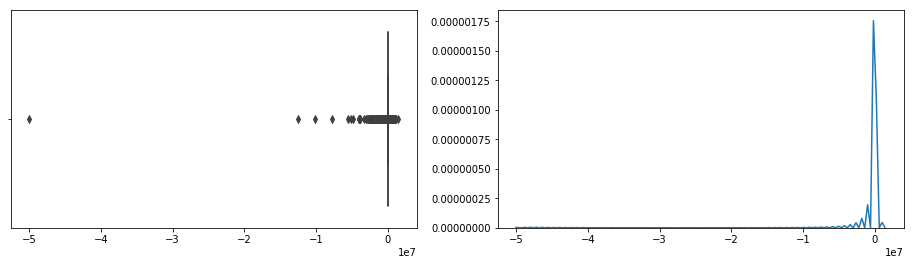

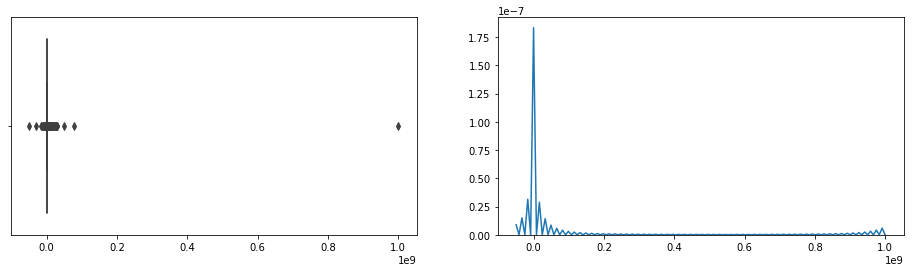

In [528]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[cols[4]]-train_df[cols[5]], ax=ax[0])
sns.kdeplot(train_df[cols[4]]-train_df[cols[5]], ax=ax[1])#,label='0')

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[train_df[cols[3]] > 0][cols[4]]-train_df[train_df[cols[5]] > 0][cols[3]], ax=ax[0])
sns.kdeplot(train_df[train_df[cols[3]] > 0][cols[4]]-train_df[train_df[cols[5]] > 0][cols[3]], ax=ax[1])#,label='0')


In [527]:
cols

['PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT']

231883 233154


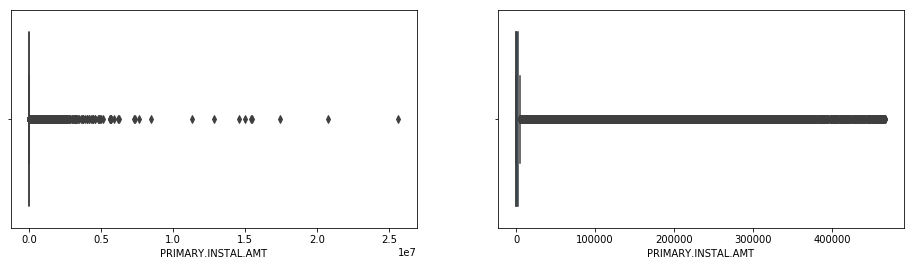

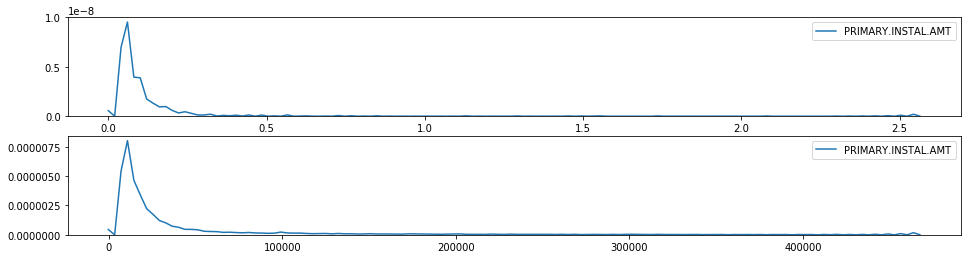

In [373]:
col = cols[6]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

# Let's investigate other columns

In [547]:
# 28 	SEC.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Secondary accounts are those which the custome...
# 29 	SEC.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
# 30 	SEC.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN

# 31 	SEC.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	NaN
# 32 	SEC.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
# 33 	SEC.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo...

cat_cols = ['SEC.ACTIVE.ACCTS', 'SEC.NO.OF.ACCTS','SEC.OVERDUE.ACCTS']
int_cols = ['SEC.CURRENT.BALANCE', 'SEC.DISBURSED.AMOUNT',
            'SEC.INSTAL.AMT','SEC.SANCTIONED.AMOUNT']

In [548]:
train_df[cat_cols].apply(lambda x: pd.Series.value_counts(x).shape[0])

SEC.ACTIVE.ACCTS     23
SEC.NO.OF.ACCTS      37
SEC.OVERDUE.ACCTS     9
dtype: int64

SEC.ACTIVE.ACCTS
(23, 3)


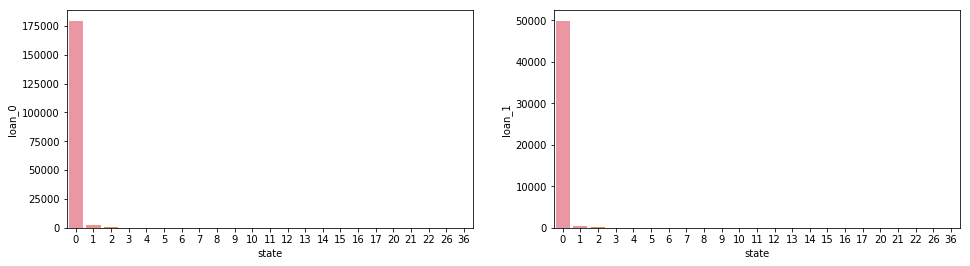

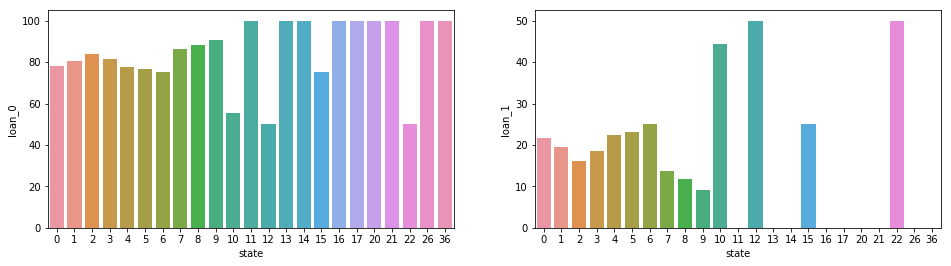

In [558]:
col = cat_cols[0]
print(col)
manufac_gps = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index
print(manufac_gps.shape)
# manufac_gps[['loan_0']] = 100*manufac_gps[['loan_0']]/train_df.shape[0]
# manufac_gps[['loan_1']] = 100*manufac_gps[['loan_1']]/train_df.shape[0]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

SEC.NO.OF.ACCTS
(37, 3)


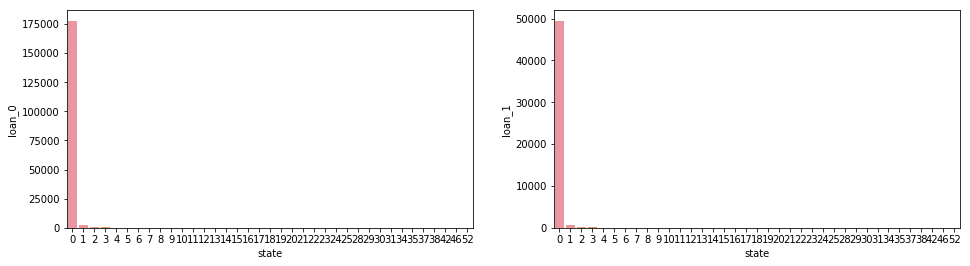

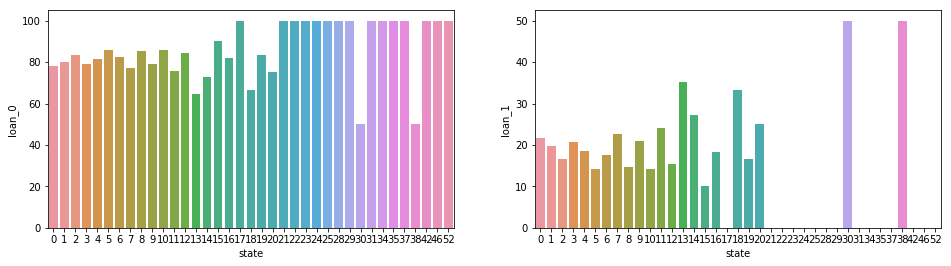

In [559]:
col = cat_cols[1]
print(col)
manufac_gps = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index
print(manufac_gps.shape)
# manufac_gps[['loan_0']] = 100*manufac_gps[['loan_0']]/train_df.shape[0]
# manufac_gps[['loan_1']] = 100*manufac_gps[['loan_1']]/train_df.shape[0]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

SEC.OVERDUE.ACCTS
(9, 3)


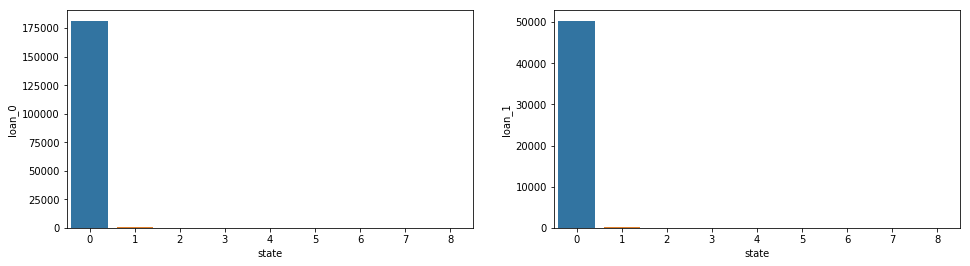

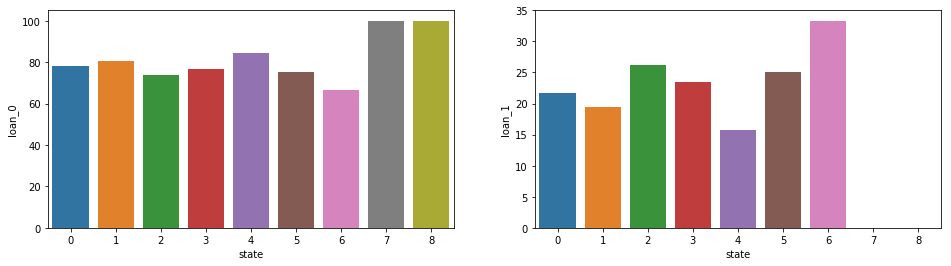

In [560]:
col = cat_cols[2]
print(col)
manufac_gps = train_df.groupby([col,'loan_default'])['loan_default'].count().unstack()
manufac_gps.columns = ['loan_0', 'loan_1']
manufac_gps['state'] = manufac_gps.index
print(manufac_gps.shape)
# manufac_gps[['loan_0']] = 100*manufac_gps[['loan_0']]/train_df.shape[0]
# manufac_gps[['loan_1']] = 100*manufac_gps[['loan_1']]/train_df.shape[0]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

manufac_gps[['loan_0','loan_1']] = 100*manufac_gps[['loan_0','loan_1']].apply(lambda x: x/x.sum(), axis=1)


fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.barplot(x='state',y="loan_0", data=manufac_gps, ax=ax[0])#,label='0')
sns.barplot(x='state',y="loan_1", data=manufac_gps, ax=ax[1])#,label='1')

In [563]:
train_df[cat_cols[0]].value_counts(), train_df[cat_cols[1]].value_counts(), \
train_df[cat_cols[2]].value_counts()

(0     229337
 1       2684
 2        636
 3        195
 4        116
 5         65
 6         32
 7         22
 8         17
 9         11
 10         9
 11         7
 12         6
 15         4
 13         3
 16         2
 22         2
 26         1
 14         1
 17         1
 20         1
 21         1
 36         1
 Name: SEC.ACTIVE.ACCTS, dtype: int64, 0     227289
 1       3466
 2       1036
 3        444
 4        292
 5        148
 6        119
 7         75
 8         68
 9         38
 10        35
 11        29
 13        17
 12        13
 16        11
 14        11
 15        10
 18         6
 19         6
 17         5
 20         4
 22         4
 23         4
 31         4
 21         3
 46         2
 24         2
 38         2
 30         2
 34         2
 37         1
 42         1
 28         1
 35         1
 29         1
 25         1
 52         1
 Name: SEC.NO.OF.ACCTS, dtype: int64, 0    231817
 1      1129
 2       126
 3        47
 4        19
 5         8
 6     

In [574]:
use_index = train_df[cat_cols[0]][train_df[cat_cols[0]]>0].index
train_df.loc[use_index, cat_cols[0]] = 1

use_index = train_df[cat_cols[1]][train_df[cat_cols[1]]>0].index
train_df.loc[use_index, cat_cols[1]] = 1

use_index = train_df[cat_cols[2]][train_df[cat_cols[2]]>0].index
train_df.loc[use_index, cat_cols[2]] = 1


# We need to categorize these `SEC` int columns

232642 233154


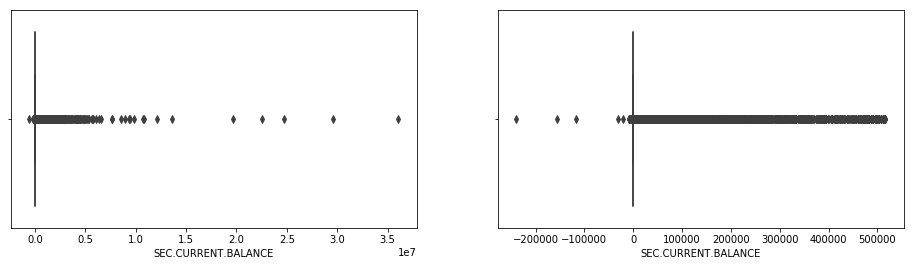

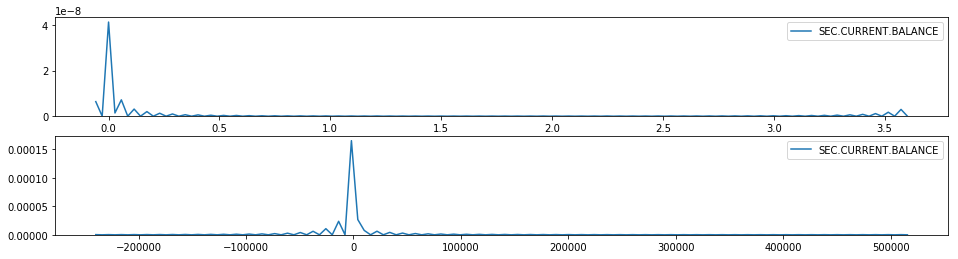

In [552]:
col = int_cols[0]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

232531 233154


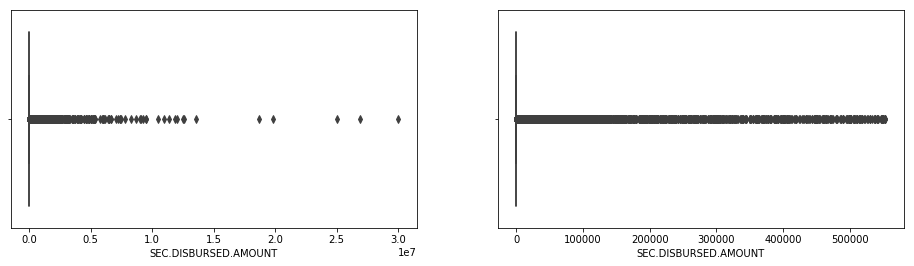

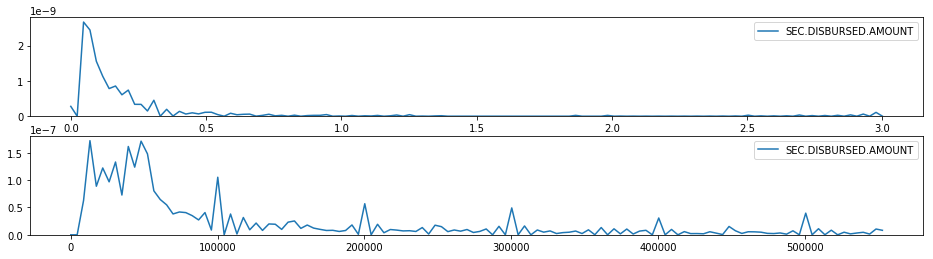

In [553]:
col = int_cols[1]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

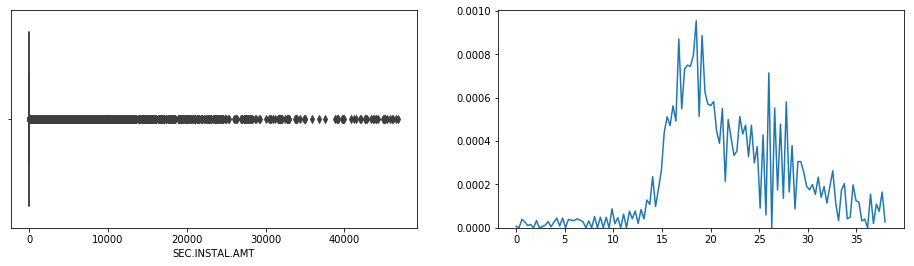

In [601]:
col = int_cols[2]
temp = train_df[train_df['PRI.CURRENT.BALANCE']<3000000][[int_cols[2]]]
tp = temp[col][(np.abs(stats.zscore(temp[[col]])) < 3).all(axis=1)]

fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(tp, ax=ax[0])
sns.kdeplot(boxcox(1+tp,lmbda=0.2),ax=ax[1])


In [603]:
tp[tp != 0]

154        9382
296        6485
316        1563
331        1065
403        1330
683        5185
710        2372
1538       1345
1589       3290
1718       9419
1759       1812
1768       2563
2038      12568
2113      14463
2212       1736
2215      10571
2247       4021
2262      15504
2286       1213
2302      45171
2308      12870
2362        433
2394       3171
2539       5813
2621       1676
2991      10575
3245       6889
3246       1534
3249        198
3280      20211
          ...  
226319    14870
226368      277
226508     7300
226793    19033
226988     4664
227666      982
229223    13302
229250     5000
229316      800
229849     6779
230169    10076
230233     1079
230239     3965
230247    17000
230399     2348
230431    10432
231198      625
231212     5082
231491    16807
231838     1232
231855      684
231868     2600
231967     2337
231970     4001
232159     9408
232173     1410
232174     1743
232348     2665
232675     2917
232829     3500
Name: SEC.INSTAL.AMT, Le

232912 233154


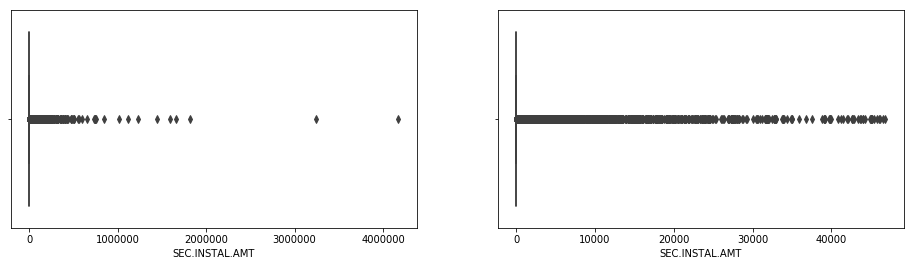

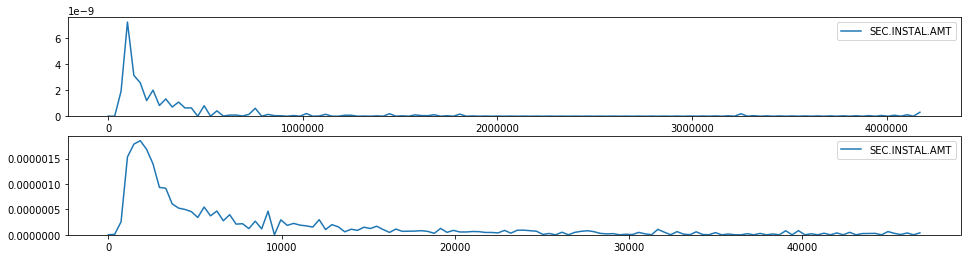

In [550]:
col = int_cols[2]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

232522 233154


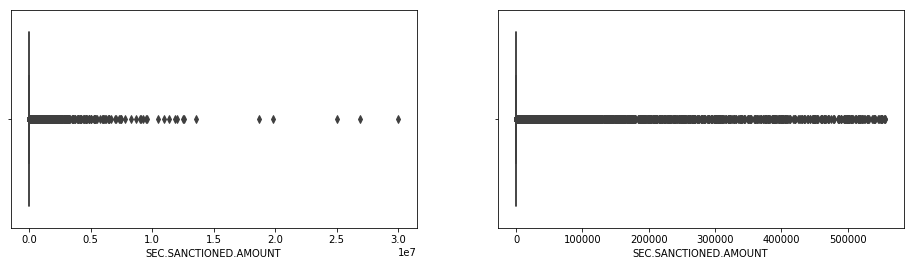

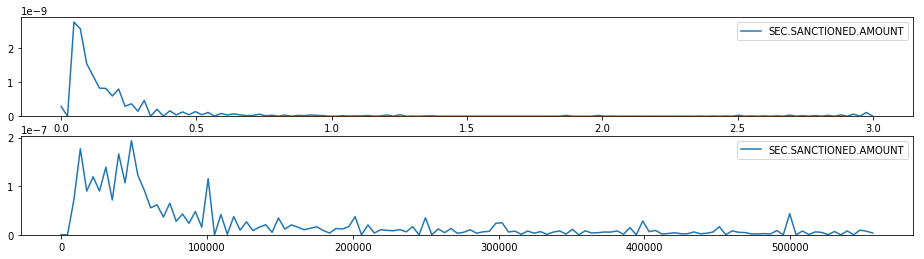

In [551]:
col = int_cols[3]
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train_df[col], ax=ax[0])

tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.boxplot(tp, ax=ax[1])
print(tp.shape[0], train_df.shape[0])

fig, ax = plt.subplots(2,1,figsize=(16,4))
sns.kdeplot(train_df[col], ax=ax[0])#,label='0')
sns.kdeplot(tp, ax=ax[1])#,label='1')

# I mess with `SEC.ACTIVE.ACCTS`, do all operation on this variable again

In [605]:
# New loans taken by the customer in last 6 mont... 	
train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [630]:
use_index = train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'][
    train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS']>1].index
train_df.loc[use_index, 'NEW.ACCTS.IN.LAST.SIX.MONTHS'] = 2
print(use_index.shape)
print(train_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts())

use_index = test_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'][
    test_df['NEW.ACCTS.IN.LAST.SIX.MONTHS']>1].index
test_df.loc[use_index, 'NEW.ACCTS.IN.LAST.SIX.MONTHS'] = 2
print(use_index.shape)
print(test_df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts())


0    181494
1     32099
2     19561
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64
(7679,)
0    90847
1    13866
2     7679
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64


In [609]:
# DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: When a loan defaults, it is sent to a debt collection agency whose job is to contact the borrower and receive the unpaid funds. 

train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
12         3
11         3
10         2
9          2
20         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [631]:
use_index = train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'][
    train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>0].index
train_df.loc[use_index, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = 1
print(use_index.shape)
print(train_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts())

use_index = test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'][
    test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>0].index
test_df.loc[use_index, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = 1
print(use_index.shape)
test_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

# train_df.groupby(['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','loan_default'])['loan_default'].count().unstack()

0    214959
1     18195
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64
(8207,)


0    104185
1      8207
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [ ]:
# 14 	MobileNo_Avl_Flag 	if Mobile no. was shared by the customer then ... 	NaN
# 15 	Aadhar_flag 	if aadhar was shared by the customer then flag... 	NaN
# 16 	PAN_flag 	if pan was shared by the customer then flagged... 	NaN
# 17 	VoterID_flag 	if voter was shared by the customer then flag... 	NaN
# 18 	Driving_flag 	if DL was shared by the customer then flagged ... 	NaN
# 19 	Passport_flag 	if passport was shared by the customer then fl... 	NaN


In [625]:
cols = ['MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag',
        'Driving_flag','Passport_flag']
train_df[cols].apply(lambda x: pd.Series.value_counts(x))

,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,NaN,37230,215533,199360,227735,232658
1,233154.0,195924,17621,33794,5419,496


In [629]:
train_df.drop('MobileNo_Avl_Flag', axis=1, inplace=True)
test_df.drop('MobileNo_Avl_Flag', axis=1, inplace=True)


In [ ]:
0 	UniqueID 	Identifier for customers 	NaN
1 	loan_default 	Payment default in the first EMI on due date 	NaN
2 	disbursed_amount 	Amount of Loan disbursed 	NaN
3 	asset_cost 	Cost of the Asset 	NaN
4 	ltv 	Loan to Value of the asset 	NaN
5 	branch_id 	Branch where the loan was disbursed 	NaN
6 	supplier_id 	Vehicle Dealer where the loan was disbursed 	NaN
7 	manufacturer_id 	Vehicle manufacturer(Hero, Honda, TVS etc.) 	NaN
8 	Current_pincode 	Current pincode of the customer 	NaN
9 	Date.of.Birth 	Date of birth of the customer 	NaN
10 	Employment.Type 	Employment Type of the customer (Salaried/Self... 	NaN
11 	DisbursalDate 	Date of disbursement 	NaN
12 	State_ID 	State of disbursement 	NaN
13 	Employee_code_ID 	Employee of the organization who logged the di... 	NaN

22 	PRI.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Primary accounts are those which the customer ...
23 	PRI.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
24 	PRI.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN
25 	PRI.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	NaN
26 	PRI.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
27 	PRI.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo... 	NaN
28 	SEC.NO.OF.ACCTS 	count of total loans taken by the customer at ... 	Secondary accounts are those which the custome...
29 	SEC.ACTIVE.ACCTS 	count of active loans taken by the customer at... 	NaN
30 	SEC.OVERDUE.ACCTS 	count of default accounts at the time of disbu... 	NaN
31 	SEC.CURRENT.BALANCE 	total Principal outstanding amount of the acti... 	NaN
32 	SEC.SANCTIONED.AMOUNT 	total amount that was sanctioned for all the l... 	NaN
33 	SEC.DISBURSED.AMOUNT 	total amount that was disbursed for all the lo... 	NaN
34 	PRIMARY.INSTAL.AMT 	EMI Amount of the primary loan 	NaN
35 	SEC.INSTAL.AMT 	EMI Amount of the secondary loan 	NaN
36 	NEW.ACCTS.IN.LAST.SIX.MONTHS 	New loans taken by the customer in last 6 mont... 	NaN
37 	DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS 	Loans defaulted in the last 6 months 	NaN
38 	AVERAGE.ACCT.AGE 	Average loan tenure 	NaN
39 	CREDIT.HISTORY.LENGTH 	Time since first loan 	NaN
40 	NO.OF_INQUIRIES 	Enquries done by the customer for loans 	NaN

In [ ]:
# 14 	MobileNo_Avl_Flag 	if Mobile no. was shared by the customer then ... 	NaN
# 15 	Aadhar_flag 	if aadhar was shared by the customer then flag... 	NaN
# 16 	PAN_flag 	if pan was shared by the customer then flagged... 	NaN
# 17 	VoterID_flag 	if voter was shared by the customer then flag... 	NaN
# 18 	Driving_flag 	if DL was shared by the customer then flagged ... 	NaN
# 19 	Passport_flag 	if passport was shared by the customer then fl... 	NaN


In [634]:
[col for col in train_df.columns]

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Employment.Type',
 'State_ID',
 'Employee_code_ID',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'day_of_birth',
 'month_of_birth',
 'year_of_birth',
 'credit_hist_year',
 'credit_hist_month',
 'loan_tenure_year',
 'loan_tenure_month',
 'day_of_disbursal',
 'month_of_disbursal',
 'year_of_disbursal',
 'Bureau_desc',
 'bureau_score',
 'loan_default']

In [636]:
cols = ['day_of_birth','month_of_birth','year_of_birth',
        'day_of_disbursal','month_of_disbursal','year_of_disbursal',
        'credit_hist_year','credit_hist_month',
        'loan_tenure_year','loan_tenure_month']


In [646]:
# train_df.groupby(['day_of_birth','month_of_birth','year_of_birth','loan_default'])['loan_default'].count().unstack()
# train_df.groupby(['credit_hist_year','credit_hist_month','loan_default'])['loan_default'].count().unstack()


In [645]:
# train_df.groupby(['credit_hist_year','loan_default'])['loan_default'].count().unstack()

In [672]:
# train_df.credit_history.value_counts().sort_index()

In [673]:
# train_df.credit_hist_year.value_counts().sort_index()

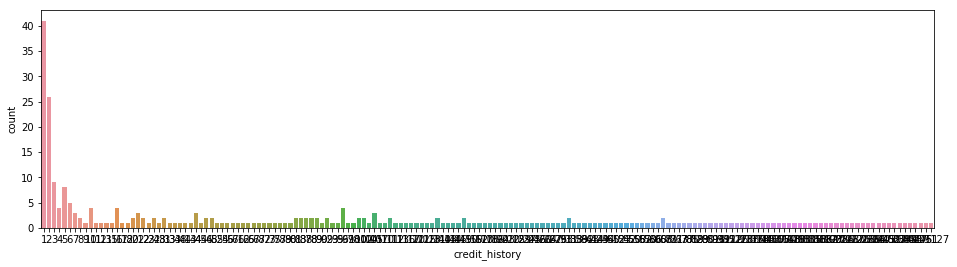

In [656]:
plt.figure(figsize=(16,4))
sns.countplot(train_df.credit_history.value_counts())

In [ ]:
train_df['credit_history'] = train_df['credit_hist_year']*12+train_df['credit_hist_month']
test_df['credit_history'] = test_df['credit_hist_year']*12+test_df['credit_hist_month']

In [671]:
bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 12), (12, 24), 
                                     (24, 36), (36, 60), (60, 120), (120,500)])
train_df['credit_history'] = pd.cut(train_df.credit_history, bins)
test_df['credit_history'] = pd.cut(test_df.credit_history, bins)

bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 3), (3, 6), (6, 9), (9, 50)])
train_df['credit_hist_year'] = pd.cut(train_df.credit_hist_year, bins)
test_df['credit_hist_year'] = pd.cut(test_df.credit_hist_year, bins)

print(train_df.credit_hist_year.value_counts())
print(train_df.credit_history.value_counts())


(-1, 0]    147802
(1, 3]      34511
(0, 1]      26613
(3, 6]      15446
(6, 9]       4423
(9, 50]      4359
Name: credit_hist_year, dtype: int64
(-1, 0]       119127
(0, 12]        32064
(12, 24]       27057
(24, 36]       20462
(36, 60]       18388
(60, 120]      11793
(120, 500]      4263
Name: credit_history, dtype: int64


In [702]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['credit_history']) + list(test_df['credit_history']))
print(le.classes_)
train_df['credit_history'] = le.transform(train_df['credit_history'])
test_df['credit_history']  = le.transform(test_df['credit_history'])

le.fit(list(train_df['credit_hist_year']) + list(test_df['credit_hist_year']))
print(le.classes_)
train_df['credit_hist_year'] = le.transform(train_df['credit_hist_year'])
test_df['credit_hist_year']  = le.transform(test_df['credit_hist_year'])


[Interval(-1, 0, closed='right') Interval(0, 12, closed='right')
 Interval(12, 24, closed='right') Interval(24, 36, closed='right')
 Interval(36, 60, closed='right') Interval(60, 120, closed='right')
 Interval(120, 500, closed='right')]
[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 3, closed='right') Interval(3, 6, closed='right')
 Interval(6, 9, closed='right') Interval(9, 50, closed='right')]


# Also try, if category further can be reduced or grouped

In [674]:
train_df[['day_of_disbursal','month_of_disbursal','year_of_disbursal']]

,day_of_disbursal,month_of_disbursal,year_of_disbursal
0,8,3,2018
1,26,9,2018
2,8,1,2018
3,26,10,2018
4,26,9,2018
5,19,9,2018
6,23,9,2018
7,16,9,2018
8,9,5,2018
9,16,9,2018


In [678]:
train_df.drop('year_of_disbursal',axis=1, inplace=True)
test_df.drop('year_of_disbursal',axis=1, inplace=True)


In [679]:
train_df.month_of_disbursal.value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: month_of_disbursal, dtype: int64

In [ ]:
cols = ['day_of_birth','month_of_birth','year_of_birth',
        'day_of_disbursal','month_of_disbursal','year_of_disbursal',
        'credit_hist_year','credit_hist_month',
        'loan_tenure_year','loan_tenure_month']

In [704]:
train_df.loan_tenure_year.value_counts()

0     168390
1      36650
2      14839
3       6622
4       3033
5       1600
6        810
7        467
8        234
9        150
10       129
11       102
12        57
13        35
14        15
15        10
16         5
17         2
24         1
18         1
22         1
30         1
Name: loan_tenure_year, dtype: int64

In [711]:
train_df.loan_tenure_month.value_counts()

0     127976
6      11085
1      10117
7       9881
4       9757
3       9720
2       9682
5       9519
8       8936
10      8842
9       8842
11      8797
Name: loan_tenure_month, dtype: int64

In [707]:
train_df['loan_tenure'] = train_df['loan_tenure_year']*12+train_df['loan_tenure_month']
test_df['loan_tenure']  = test_df['loan_tenure_year']*12+test_df['loan_tenure_month']

In [712]:
bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 12), (12, 24), (24, 60), (60,500)])
train_df['loan_tenure'] = pd.cut(train_df.loan_tenure, bins)
test_df['loan_tenure'] = pd.cut(test_df.loan_tenure, bins)

bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 2), (2, 5), (5, 10), (10, 50)])
train_df['loan_tenure_year'] = pd.cut(train_df.loan_tenure_year, bins)
test_df['loan_tenure_year'] = pd.cut(test_df.loan_tenure_year, bins)

print(train_df.loan_tenure.value_counts())
print(train_df.loan_tenure_year.value_counts())


(-1, 0]      119373
(0, 12]       54048
(12, 24]      33582
(24, 60]      22715
(60, 500]      3436
Name: loan_tenure, dtype: int64
(-1, 0]     168390
(0, 1]       36650
(1, 2]       14839
(2, 5]       11255
(5, 10]       1790
(10, 50]       230
Name: loan_tenure_year, dtype: int64


In [713]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(train_df['loan_tenure']) + list(test_df['loan_tenure']))
print(le.classes_)
train_df['loan_tenure'] = le.transform(train_df['loan_tenure'])
test_df['loan_tenure']  = le.transform(test_df['loan_tenure'])

le.fit(list(train_df['loan_tenure_year']) + list(test_df['loan_tenure_year']))
print(le.classes_)
train_df['loan_tenure_year'] = le.transform(train_df['loan_tenure_year'])
test_df['loan_tenure_year']  = le.transform(test_df['loan_tenure_year'])


[Interval(-1, 0, closed='right') Interval(0, 12, closed='right')
 Interval(12, 24, closed='right') Interval(24, 60, closed='right')
 Interval(60, 500, closed='right')]
[Interval(-1, 0, closed='right') Interval(0, 1, closed='right')
 Interval(1, 2, closed='right') Interval(2, 5, closed='right')
 Interval(5, 10, closed='right') Interval(10, 50, closed='right')]


In [ ]:
# 'day_of_birth','month_of_birth','year_of_birth',
#         'day_of_disbursal','month_of_disbursal','year_of_disbursal'

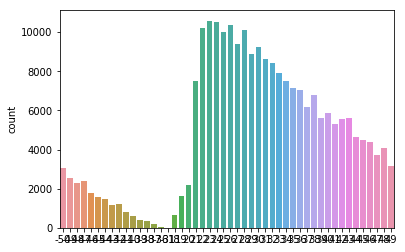

In [716]:
sns.countplot(train_df_save['year_of_disbursal'] - train_df['year_of_birth'])

In [718]:
train_df_save['year_of_disbursal'].unique()

array([2018])

In [751]:
sorted(test_df['year_of_birth'].unique())

[1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068]

In [752]:
train_df.year_of_birth = train_df.year_of_birth.apply(lambda x: int(str(19)+str(x)[-2:]))
test_df.year_of_birth  = test_df.year_of_birth.apply(lambda x: int(str(19)+str(x)[-2:]))

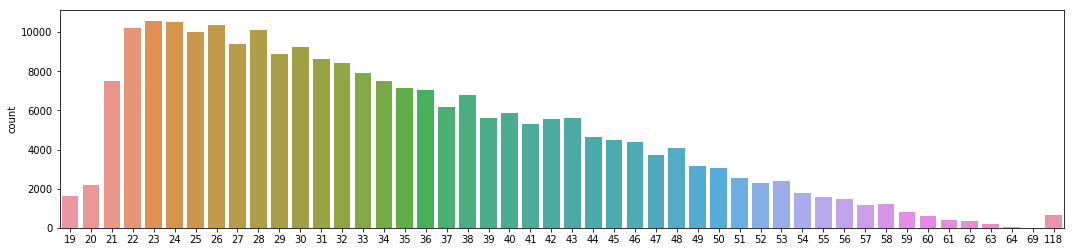

In [754]:
plt.figure(figsize=(18,4))
sns.countplot(train_df_save['year_of_disbursal'] - train_df['year_of_birth'])

In [755]:
train_df['age_till_disbursal'] = train_df_save['year_of_disbursal'] - train_df['year_of_birth']
test_df['age_till_disbursal']  = test_df_save['year_of_disbursal'] - test_df['year_of_birth']

In [758]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,loan_tenure_year,loan_tenure_month,day_of_disbursal,month_of_disbursal,Bureau_desc,bureau_score,loan_default,credit_history,loan_tenure,age_till_disbursal
0,420825,50578,58400,89.55,67,22807,45,1441,0,6,...,0,0,8,3,13,0,0,0,0,34
1,537409,47145,65550,73.23,67,22807,45,1502,1,6,...,1,11,26,9,8,598,1,2,2,33
2,417566,53278,61360,89.63,67,22807,45,1497,1,6,...,0,0,8,1,13,0,0,0,0,33
3,624493,57513,66113,88.48,67,22807,45,1501,1,6,...,0,8,26,10,11,305,1,2,1,25
4,539055,52378,60300,88.39,67,22807,45,1495,1,6,...,0,0,26,9,13,0,1,0,0,41


In [759]:
train_df_save1 = train_df.copy()
test_df_save1 = test_df.copy()

target = train_df['loan_default']
train_df.drop(['UniqueID','loan_default'], axis=1, inplace=True)
test_df.drop('UniqueID', axis=1, inplace=True)


In [762]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import lightgbm as lgb

features = train_df.columns
param = {
    'bagging_freq'           : 5,
    'bagging_fraction'       : 0.33,
    'boost_from_average'     : 'false',
    'boost'                  : 'gbdt',
    'feature_fraction'       : 0.3,
    'learning_rate'          : 0.01,
    'max_depth'              : -1,
    'metric'                 : 'auc',
    'min_data_in_leaf'       : 100,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves'             : 30,
    'num_threads'            : 4,
    'tree_learner'           : 'serial',
    'objective'              : 'binary',
    'verbosity'              : 1,
#     'lambda_l1'              : 0.001,
    'lambda_l2'              : 0.5
}   

n_splits = splits
num_round = 10000
folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
oof_lgb = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
cat_columns = list(temp[temp<50].index)

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print(trn_idx.shape, val_idx.shape)
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns)

    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                          feature_name=list(train_df.columns))#,
#                           categorical_feature=cat_columns) 

    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=50, early_stopping_rounds = 25)
    oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                               num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
    print("="*60)

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

sub_df = pd.DataFrame({"ID_code":test_id})
sub_df["target"] = predictions

sub_df.columns = sub.columns
sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)



(116576,) (116578,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[50]	training's auc: 0.662321	valid_1's auc: 0.648853
[100]	training's auc: 0.666541	valid_1's auc: 0.65228
[150]	training's auc: 0.670195	valid_1's auc: 0.654672
[200]	training's auc: 0.673232	valid_1's auc: 0.656703
[250]	training's auc: 0.676041	valid_1's auc: 0.658222
[300]	training's auc: 0.679122	valid_1's auc: 0.659878
[350]	training's auc: 0.681492	valid_1's auc: 0.661
[400]	training's auc: 0.683664	valid_1's auc: 0.662011


KeyboardInterrupt: 

<BarContainer object of 46 artists>

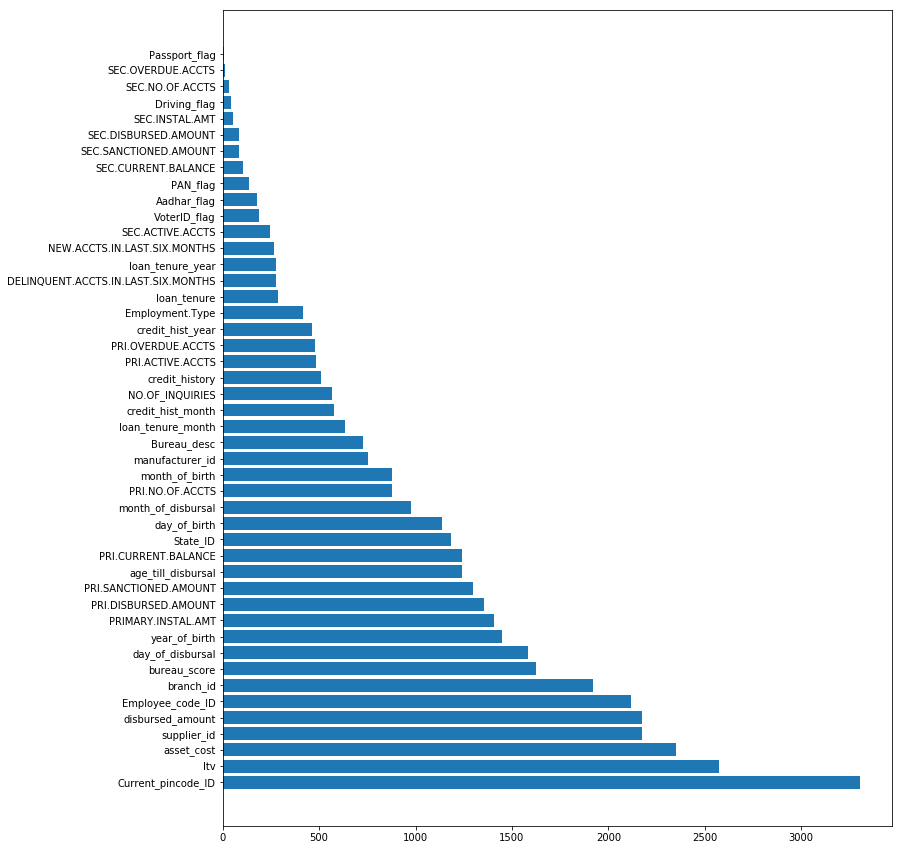

In [761]:

lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
lgb_imp.columns = ['feature','imp']
lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
plt.figure(figsize=(12,15))
plt.barh(lgb_imp.feature, lgb_imp.imp)